## **ПРОЕКТ ПО ML: Прогноз спроса на аренду велосипедов (Bike Sharing)**

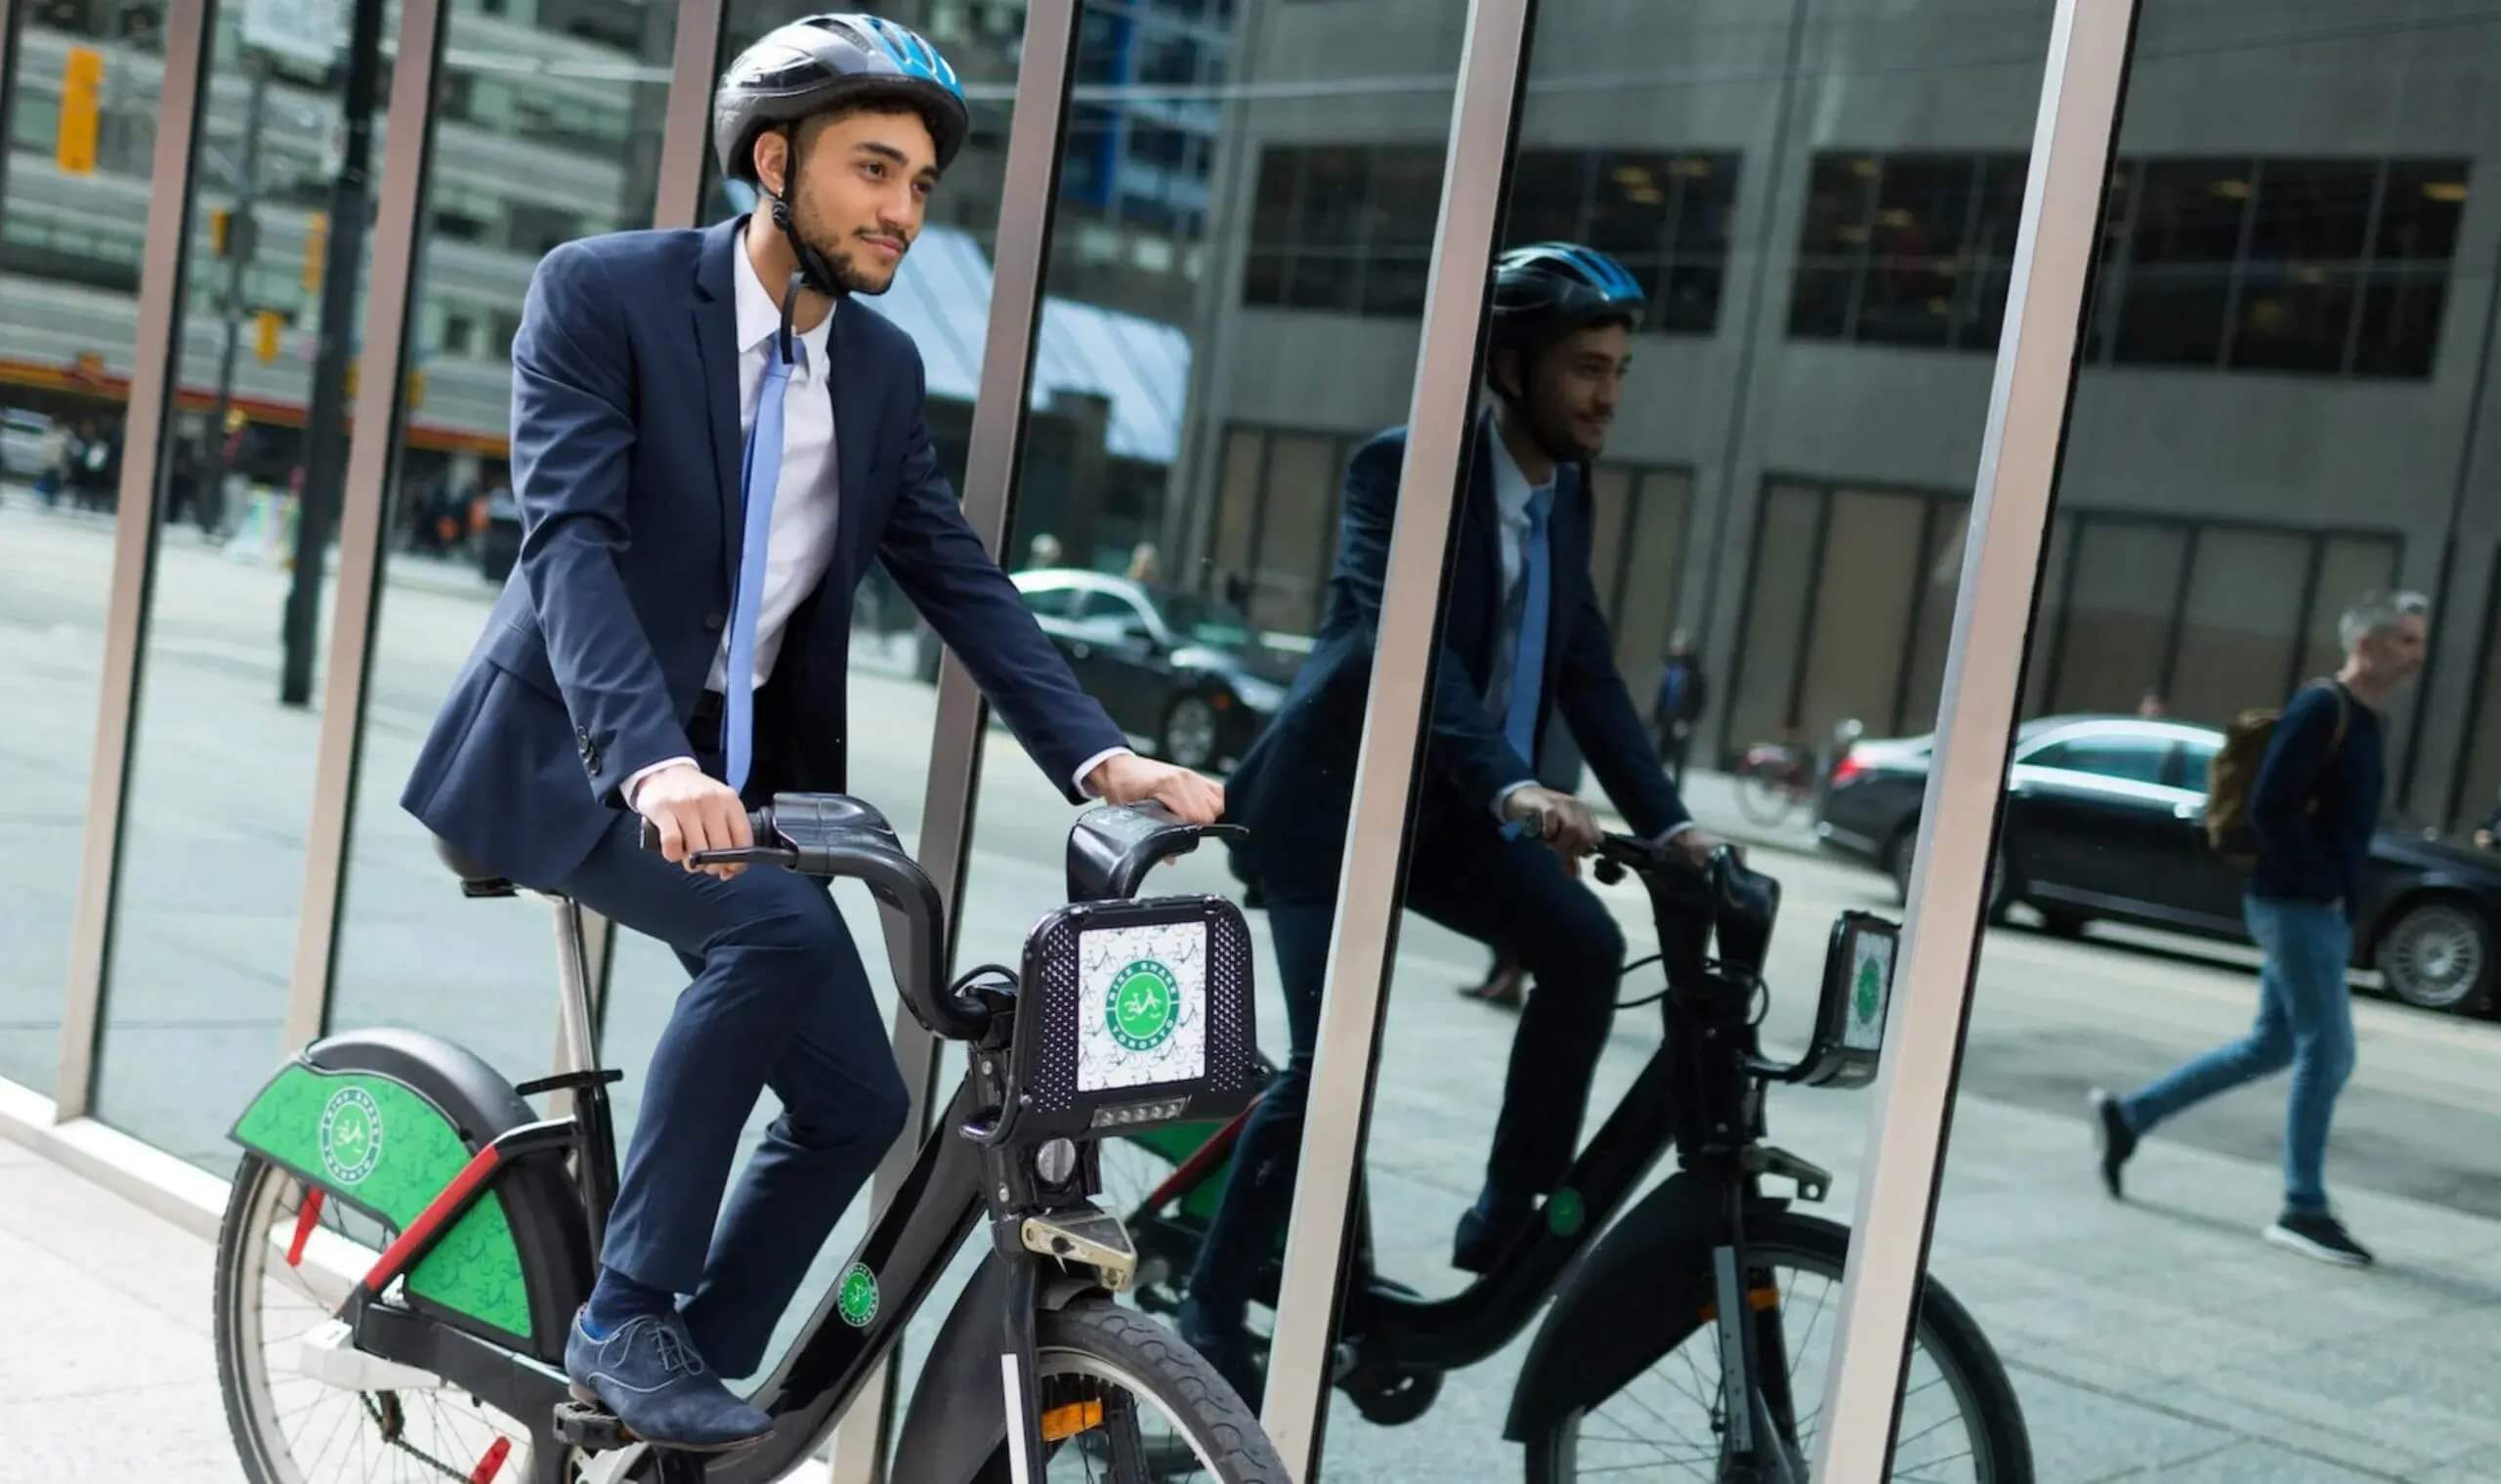

# **Этап №1**

### **Наша команда**:
Зейтц Дмитрий Михайлович

Шукурлаев Егор Артурович

Чурилова Мария Дмитриевна

Старых Матвей Александрович

### **Цель проекта:**

Мы хотим построить модель, которая предсказывает количество аренд велосипедов в конкретный час на основе календарных признаков, погодных условий и характеристик дня. Для этого будем использовать  данные по велопрокату Capital Bikeshare и решать задачу регрессии.

### **Постановка нашей задачи**

Мы хотим предсказывать значение cnt - кол-во аренд велосипедов за конкретный час.

**Тип задачи:** регрессия

**Зачем это нужно в бизнес-контексте:**

1. обеспечить достаточное число велосипедов в популярных локациях

2. уменьшить ситуации, когда велосипедов не хватает

3. оптимизировать работу машин, которые перевозят велосипеды

4. снизить затраты

5. улучшить сервис и пользовательский опыт

### **Описание датасета**

Мы используем Bike Sharing Dataset - это реальные данные из системы Capital Bikeshare (Вашингтон, США) за 2011–2012 годы.

**Файлы:**

*hour.csv* — данные по часам (17 379 строк)

*day.csv*— данные по дням (731 строк)

**Основные признаки:**

1. *Идентификатор и дата*

instant (integer) - порядковый номер записи

dteday (date) - календарная дата

2. *Календарные признаки*

season (categorical) - сезон года

yr (categorical) - год наблюдения

mnth (categorical) - месяц

hr (categorical) - час суток

weekday (categorical) - день недели

holiday (binary) - официальный праздник или нет

workingday (binary) - рабочий день или нет

3. *Погодные признаки*

weathersit (categorical) - тип погоды

temp (continuous) - нормализованная температура

atemp (continuous) - нормализованная температура «по ощущению»

hum (continuous) - нормализованная влажность

windspeed (continuous) - нормализованная скорость ветра

4. *Пользовательские признаки*

casual (integer) - количество незарегистрированных пользователей

registered (integer) - количество зарегистрированных пользователей

5. *Целевая переменная*

cnt (integer) - общее количество аренд

### **Загрузим и посмотрим данные:**

In [1]:
import gdown

In [2]:
!gdown 1mHMmky-7ZC4Lh_oq3RtaMTxZZ4wZJBAx

Downloading...
From: https://drive.google.com/uc?id=1mHMmky-7ZC4Lh_oq3RtaMTxZZ4wZJBAx
To: /Users/dimazeitts/Downloads/hour.csv
100%|██████████████████████████████████████| 1.16M/1.16M [00:00<00:00, 10.9MB/s]


In [3]:
!gdown 1JkWTnT7fF3NDSmuozVFqnwO4f1EuqKbI

Downloading...
From: https://drive.google.com/uc?id=1JkWTnT7fF3NDSmuozVFqnwO4f1EuqKbI
To: /Users/dimazeitts/Downloads/day.csv
100%|██████████████████████████████████████| 57.6k/57.6k [00:00<00:00, 2.56MB/s]


In [4]:
import pandas as pd

hour = pd.read_csv('hour.csv')
day = pd.read_csv('day.csv')

hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

данные целевого признака cnt сльно варьируются, что в целом логично для почасовых аренд

### **Проверим пропуски:**

In [7]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

пропуски отсутствуют

### **EDA**

преобразуем дату в datetime

In [8]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

посмотрим распределение cnt

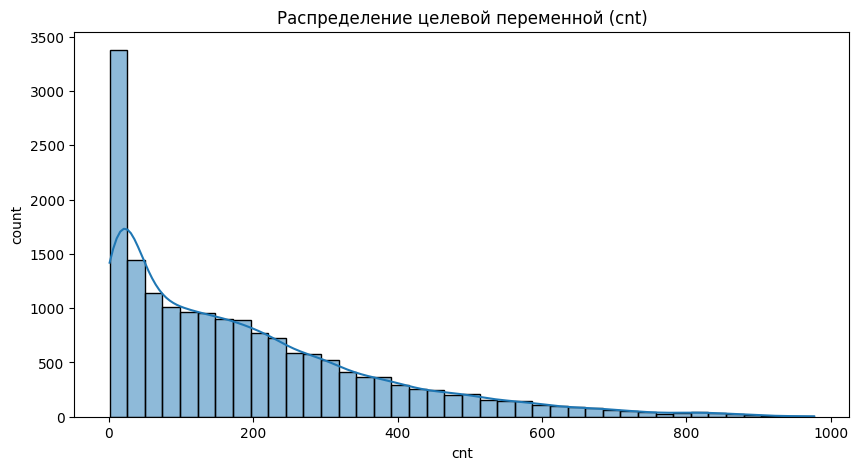

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(hour['cnt'], bins=40, kde=True)
plt.title("Распределение целевой переменной (cnt)")
plt.xlabel("cnt")
plt.ylabel("count")
plt.show()

распределение целевой переменной cnt сильно смещено влево. такая форма распределения это база для данных с неравномерной нагрузкой в течение суток и указывает на присутствие выраженной сезонности и редких пиковых значений.

визуализируем сезонность по часам суток:

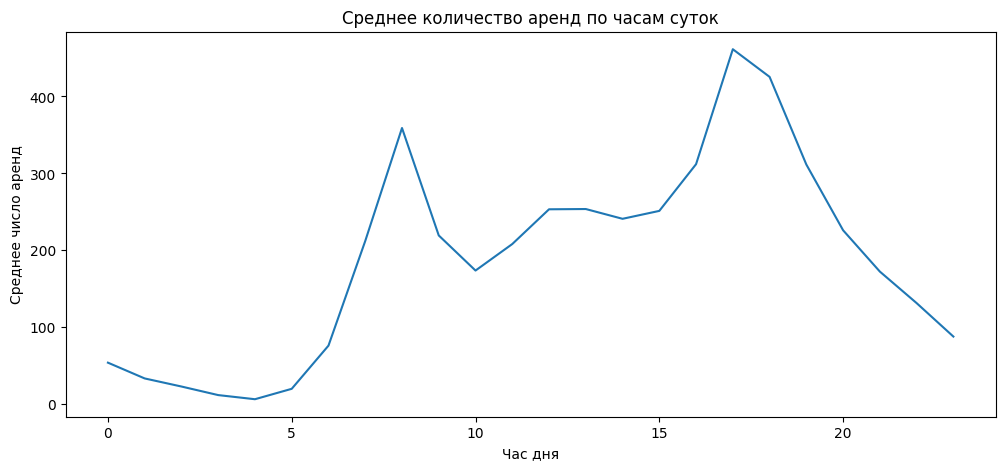

In [10]:
plt.figure(figsize=(12,5))
sns.lineplot(x='hr', y='cnt', data=hour.groupby('hr')['cnt'].mean().reset_index())
plt.title("Среднее количество аренд по часам суток")
plt.xlabel("Час дня")
plt.ylabel("Среднее число аренд")
plt.show()

тут можно заметить, что пики приходятся на 8 утра и где-то 17-18 вечера, что очень логично, тк совпадает с пиковыми часами поездок людей на работу/учёбу и тд. и обратно

теперь посмотрим на сезонность по дням недели:

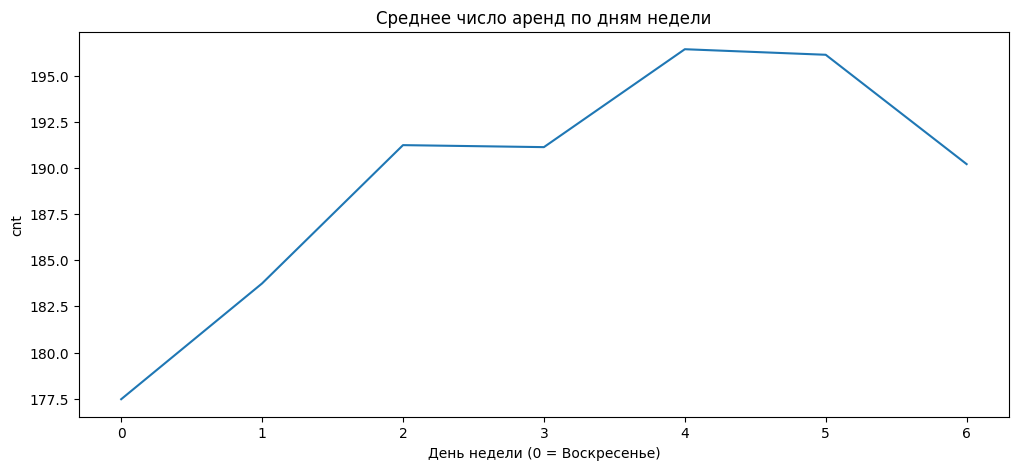

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(x='weekday', y='cnt', data=hour.groupby('weekday')['cnt'].mean().reset_index())
plt.title("Среднее число аренд по дням недели")
plt.xlabel("День недели (0 = Воскресенье)")
plt.show()

среднее число аренд постепенно растёт от воскресенья к середине недели и достигает максимума в четверг–пятницу, это показывает нормальную недельную сезонность с пиком в конце рабочей недели.

смотрим сезонность по месяцам:

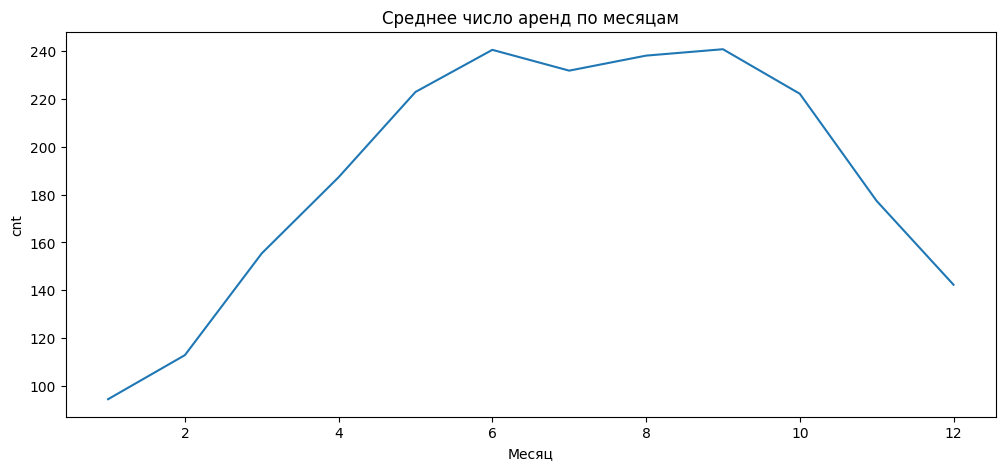

In [12]:
plt.figure(figsize=(12,5))
sns.lineplot(x='mnth', y='cnt', data=hour.groupby('mnth')['cnt'].mean().reset_index())
plt.title("Среднее число аренд по месяцам")
plt.xlabel("Месяц")
plt.show()

тут вообще всё очевидно, в летнее теплое время с мая по сентябрь пик спроса на велосипеды, а зимой минимум, тк холодно, что подтверждает сильную сезонность, связанную с климатом.

влияние температуры:

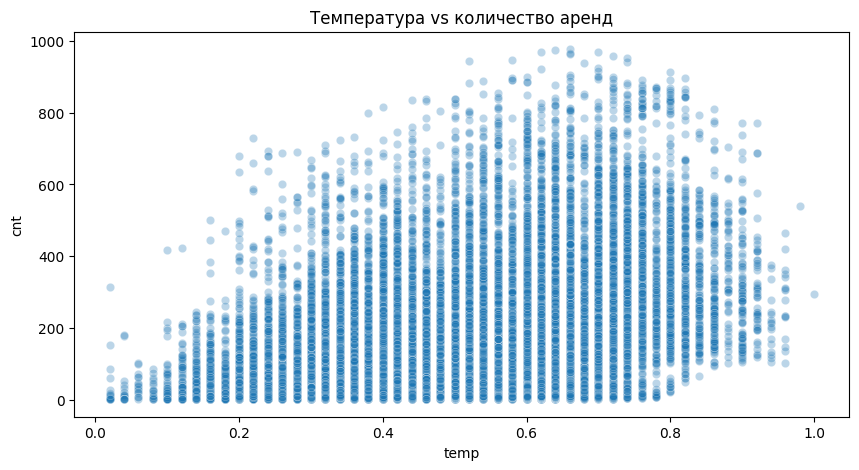

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='cnt', data=hour, alpha=0.3)
plt.title("Температура vs количество аренд")
plt.show()

тоже все понятно: с ростом температуры кол-во аренд увеличивается и достигает максимума при тёплой погоде, а при холоде или жаре спрос снижается.

влияние влажности:

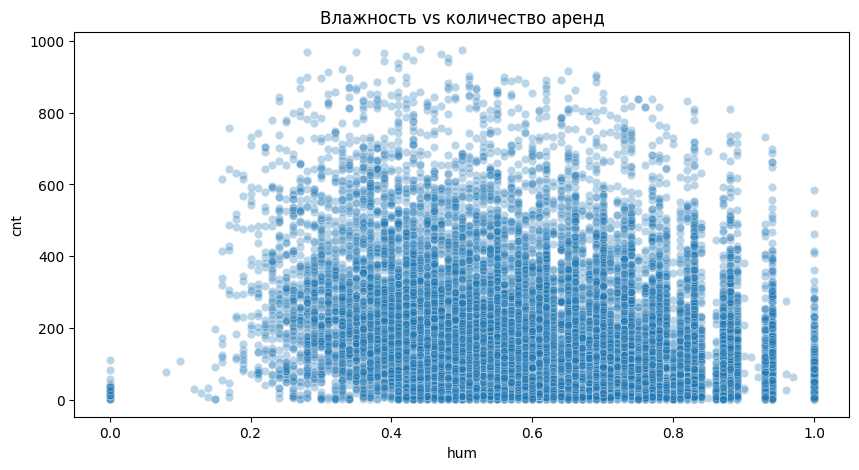

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='hum', y='cnt', data=hour, alpha=0.3)
plt.title("Влажность vs количество аренд")
plt.show()

при высокой влажности спрос заметно снижается, а макс значения аренд встречаются при средней влажности.

влияние скорости ветра:

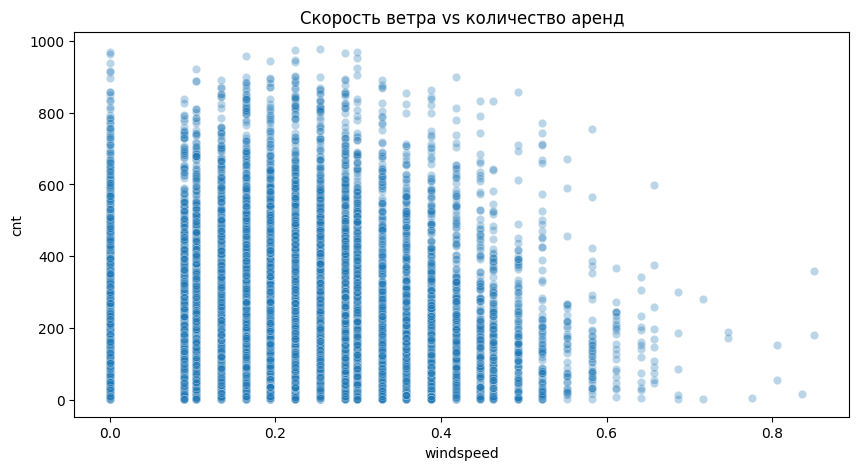

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='windspeed', y='cnt', data=hour, alpha=0.3)
plt.title("Скорость ветра vs количество аренд")
plt.show()

видно, что при слабом ветре аренды встречаются чаще, а при усилении ветра спрос постепенно снижается.

посмотрим боксплотами распределение аренд по типам погоды:

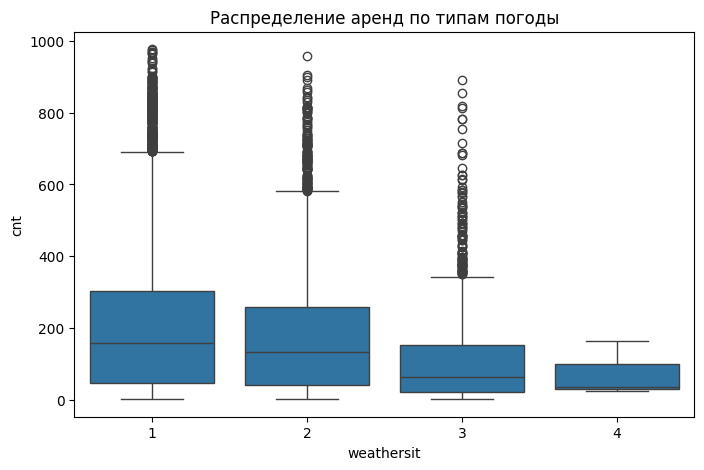

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=hour)
plt.title("Распределение аренд по типам погоды")
plt.show()

спрос на велосипеды максимален при хорошей погоде (weathersit=1), заметно падает при облачности и тумане (2), ещё сильнее - при дожде и снеге (3), и достигает минимума в штормовых условиях (4).

построим корреляционную матрицу:

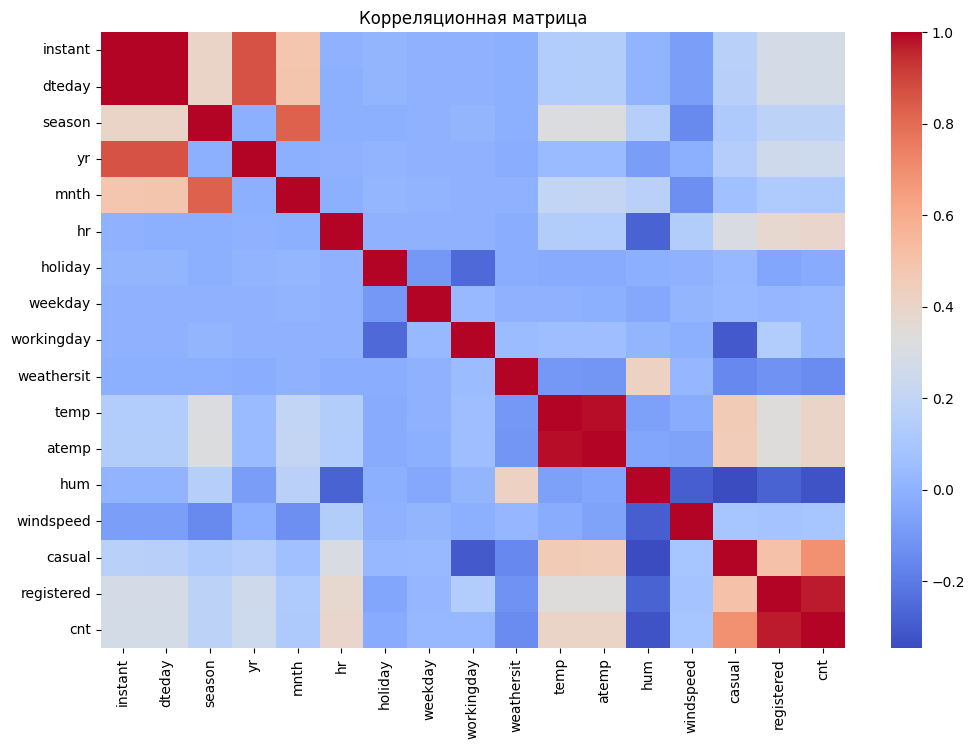

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(hour.corr(), cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

из интересного: признаки casual и registered практически полностью повторяют целевую переменную cnt, поэтому их нельзя использовать в модели, а остальные признаки имеют слабую корреляцию с количеством аренд.

### **Построим BASELINE**

в ячейке выше поняли, что casual и registered нельзя использовать

In [18]:
from sklearn.model_selection import train_test_split

X = hour.drop(['cnt', 'casual', 'registered', 'dteday'], axis=1)
y = hour['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((13903, 13), (3476, 13))

просто для ускорения работы

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(true, pred):
    rmse = (mean_squared_error(true, pred)) ** 0.5
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return rmse, mae, r2

BASELINE - DummyRegressor

In [20]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

dummy_rmse, dummy_mae, dummy_r2 = evaluate(y_test, pred_dummy)
dummy_rmse, dummy_mae, dummy_r2

(178.03491698930847, 140.07983470382123, -0.0009796282323204508)

BASELINE - LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

lr_rmse, lr_mae, lr_r2 = evaluate(y_test, pred_lr)
lr_rmse, lr_mae, lr_r2

(139.2011234399905, 104.79588148607543, 0.3880719703569244)

BASELINE - RandomForest

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rf_rmse, rf_mae, rf_r2 = evaluate(y_test, pred_rf)
rf_rmse, rf_mae, rf_r2

(40.57491774979663, 24.09036823935558, 0.9480087615818421)

сделаем сводную табличку:

In [23]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Dummy", "Linear Regression", "Random Forest"],
    "RMSE": [dummy_rmse, lr_rmse, rf_rmse],
    "MAE": [dummy_mae, lr_mae, rf_mae],
    "R2": [dummy_r2, lr_r2, rf_r2]})
results

Model        RMSE         MAE        R2
0              Dummy  178.034917  140.079835 -0.000980
1  Linear Regression  139.201123  104.795881  0.388072
2      Random Forest   40.574918   24.090368  0.948009

*Вывод по бейзлайнам:*

DR работает плохо и почти не объясняет данные. LR заметно лучше, но всё ещё ограничена. RF же показывает отличное качество и становится сильным baseline, который хорошо описывает спрос на велосипеды.


# **Этап №2**

### **Работа с аномалиями и выбросами**

In [24]:
hour = hour.copy()
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [25]:
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
hour[num_cols].describe()

cnt          temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean     189.463088      0.496987      0.475775      0.627229      0.190098
std      181.387599      0.192556      0.171850      0.192930      0.122340
min        1.000000      0.020000      0.000000      0.000000      0.000000
25%       40.000000      0.340000      0.333300      0.480000      0.104500
50%      142.000000      0.500000      0.484800      0.630000      0.194000
75%      281.000000      0.660000      0.621200      0.780000      0.253700
max      977.000000      1.000000      1.000000      1.000000      0.850700

**IQR (межквартильный размах)**

In [26]:
def iqr_outliers_flags(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    flag = (df[col] < low) | (df[col] > high)
    return flag, low, high

iqr_info = {}
for c in num_cols:
    flag, low, high = iqr_outliers_flags(hour, c, k=1.5)
    iqr_info[c] = (flag.sum(), low, high)

pd.DataFrame(
    [(c, v[0], v[1], v[2]) for c, v in iqr_info.items()],
    columns=['feature', 'n_outliers', 'low_bound', 'high_bound']).sort_values('n_outliers', ascending=False)

feature  n_outliers  low_bound  high_bound
0        cnt         505 -321.50000   642.50000
4  windspeed         342   -0.11930     0.47750
3        hum          22    0.03000     1.23000
1       temp           0   -0.14000     1.14000
2      atemp           0   -0.09855     1.05305

визуализируем

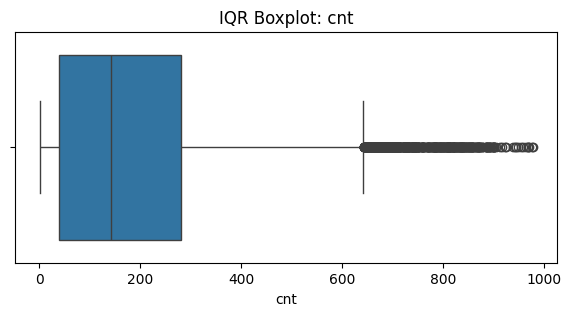

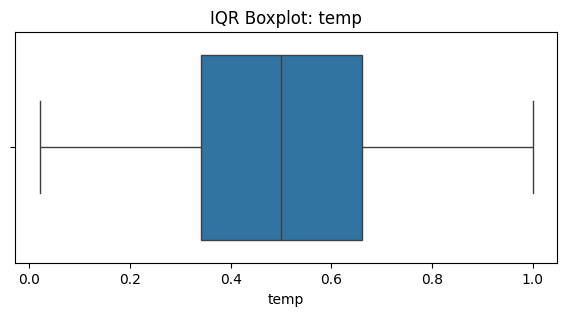

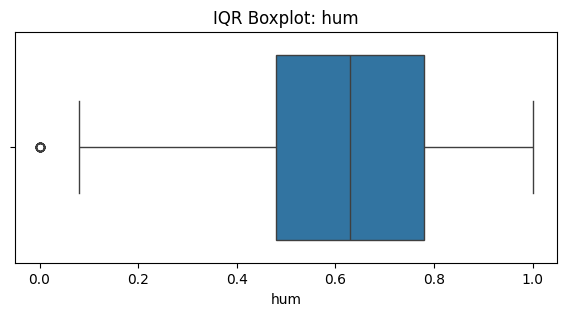

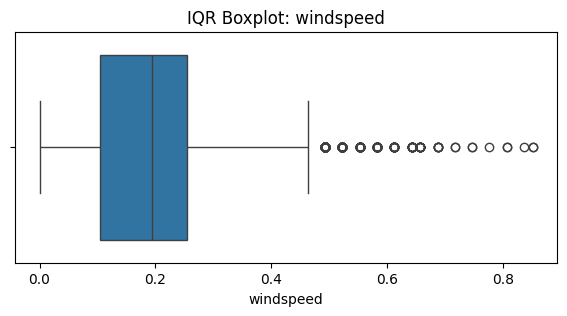

In [27]:
for c in num_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(x=hour[c])
    plt.title(f'IQR Boxplot: {c}')
    plt.show()

IQR показал, что выбросы возникают у cnt и windspeed, но высокие значения cnt соответствуют реальным пиковым периодам спроса, поэтому их нельзя считать ошибками, а
выбросы по windspeed и один маленький выброс по hum отражают экстремальные погодные условия и тоже могут влиять на спрос.остальных выбросов не видно.

нельзя удалить эти аномалии, тк они отражают реальные случаи.

**Z-score**

In [28]:
import numpy as np
def zscore_flags(series, z_thr=3.0):
    s = series.astype(float)
    z = (s - s.mean()) / (s.std(ddof=0) + 1e-9)
    return np.abs(z) > z_thr, z

z_info = {}
for c in num_cols:
    flag, z = zscore_flags(hour[c], z_thr=3.0)
    z_info[c] = (flag.sum(),)

pd.DataFrame(
    [(c, z_info[c][0]) for c in num_cols],
    columns=['feature', 'n_outliers_zscore']).sort_values('n_outliers_zscore', ascending=False)

feature  n_outliers_zscore
0        cnt                244
4  windspeed                107
3        hum                 22
2      atemp                  1
1       temp                  0

визуализируем для двух признаков (windspeed и hum)

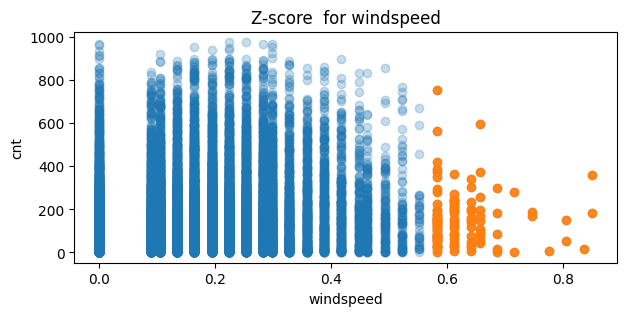

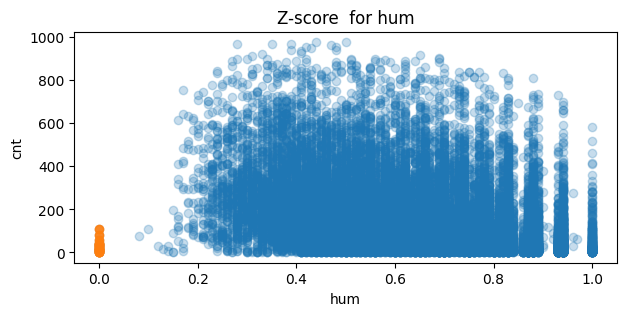

In [29]:
for c in ['windspeed', 'hum']:
    flag, z = zscore_flags(hour[c], z_thr=3.0)
    plt.figure(figsize=(7,3))
    plt.scatter(hour[c], hour['cnt'], alpha=0.25)
    plt.scatter(hour.loc[flag, c], hour.loc[flag, 'cnt'], alpha=0.9)
    plt.xlabel(c)
    plt.ylabel('cnt')
    plt.title(f'Z-score  for {c}')
    plt.show()

Z-оценка подтверждает наличие экстремальных значений, но они опять же отражают реальные сценарии

**Тест Граббса**

тк тест предполагает поиск одного выброса за раз и близость к нормальному распределению, применим его не ко всем признакам сразу, а только к windspeed и сделаем итеративно 1–3 шага.

In [30]:
from scipy import stats

def grubbs_test_one_outlier(x, alpha=0.05):
    x = np.asarray(x, dtype=float)
    n = len(x)
    mean = x.mean()
    std = x.std(ddof=1)
    if n < 3 or std == 0:
        return None
    deviations = np.abs(x - mean)
    i = deviations.argmax()
    G = deviations[i] / std
    t_crit = stats.t.ppf(1 - alpha/(2*n), n-2)
    G_crit = ((n-1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n-2 + t_crit**2))

    return i if G > G_crit else None

def grubbs_iterative(series, alpha=0.05, max_outliers=3):
    s = series.dropna().astype(float).copy()
    idxs = []
    s_work = s.copy()
    for _ in range(max_outliers):
        pos = grubbs_test_one_outlier(s_work.values, alpha=alpha)
        if pos is None:
            break
        outlier_index = s_work.index[pos]
        idxs.append(outlier_index)
        s_work = s_work.drop(outlier_index)
    return idxs

grubbs_idxs = grubbs_iterative(hour['windspeed'], alpha=0.05, max_outliers=3)
grubbs_idxs

[np.int64(4315), np.int64(4316), np.int64(5635)]

визуализируем

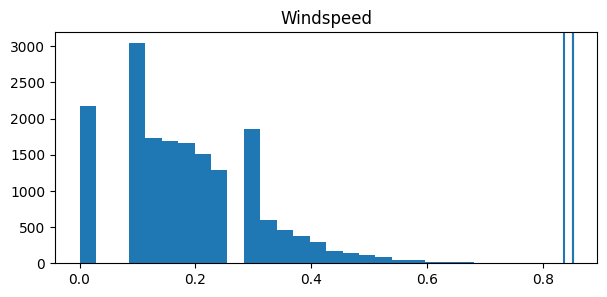

In [31]:
plt.figure(figsize=(7,3))
plt.hist(hour['windspeed'], bins=30)
plt.title("Windspeed")
for idx in grubbs_idxs:
    plt.axvline(hour.loc[idx, 'windspeed'])
plt.show()

тест граббса для признака windspeed опять, как и предыдущие статистические методы, выявил несколько одиночных экстремальных значений с очень высокой скоростью ветра; эти наблюдения редкие, но такие погодные условия возможны, следовательно не считаются ошибками измерения.

**вывод:**

вообще с точки зрения распределений, аномилии выделяются как значения, которые удалены от основных наблюдений и стат методы, как мы видим, стабильно находят эти редкие точки.

если говорить с точки зрения бизнес-контеста, такие наблюдения необычны, но тем не менее соответстуют реальным ситуациям, следовательно они аномальны по частоте встречаемости, но вполне логичны по смыслу.

тк найденные аномалии не являются ошибками данных, удаление их приведёт к потере информации о пиковых и экстремальных условиях, что ухудшит качество модели в ключевых ситуациях => используем их для генерации каких-нибудь доп признаков, чтобы моделька лучше учитывала редкие, но всё ещё важные случаи.

создадим флаги аномалий

In [32]:
hour['has_windspeed_outlier'] = (
    (hour['windspeed'] < iqr_info['windspeed'][1]) |
    (hour['windspeed'] > iqr_info['windspeed'][2])).astype(int)
hour['has_hum_outlier'] = (
    (hour['hum'] < iqr_info['hum'][1]) |
    (hour['hum'] > iqr_info['hum'][2])).astype(int)

добавим счётчик количества погодных выбросов

In [33]:
hour['n_weather_outliers'] = (hour['has_windspeed_outlier'] + hour['has_hum_outlier'])

расстояние до ближайших точек

In [34]:
from sklearn.neighbors import NearestNeighbors

weather_features = hour[['temp', 'hum', 'windspeed']]

nn = NearestNeighbors(n_neighbors=2)
nn.fit(weather_features)

distances, _ = nn.kneighbors(weather_features)
hour['weather_nn_distance'] = distances[:, 1]

**интерпретация признаков:**

has_windspeed_outlier - признак показывает, есть ли выброс по скорости ветра

has_hum_outlier - есть ли выброс по влажности

n_weather_outliers - кол-во погодных признаков с выбросами одновременно

weather_nn_distance - мера редкости погодных условий по сравнению с другими наблюдениями

как они могут помочь?

они позволят модели учитывать экстремальные погодные условия, при которых спрос на велосипеды может отличаться от среднего, что в свою очередь может улучшить качество прогноза.


используем ml-методы для поиска сложных выбросов

подготовим данные и настроим параметры

In [35]:
from sklearn.preprocessing import StandardScaler

anomaly_features = ['temp', 'hum', 'windspeed', 'hr', 'weekday', 'weathersit', 'workingday']
X_anom = hour[anomaly_features].copy()
scaler = StandardScaler()
X_anom_scaled = scaler.fit_transform(X_anom)

алгоритм №1: Isolation Forest

In [36]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=300,
    contamination=0.03,
    random_state=42)

iso.fit(X_anom_scaled)

iso_pred = iso.predict(X_anom_scaled)
hour['anomaly_iforest'] = (iso_pred == -1).astype(int)

hour['iforest_score'] = -iso.score_samples(X_anom_scaled)
hour['anomaly_iforest'].mean()

np.float64(0.03003625064733299)

алгоритм №2: LOF

In [37]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=35,
    contamination=0.03)

lof_pred = lof.fit_predict(X_anom_scaled)
hour['anomaly_lof'] = (lof_pred == -1).astype(int)

hour['lof_score'] = -lof.negative_outlier_factor_
hour['anomaly_lof'].mean()

np.float64(0.03003625064733299)

визуализируем

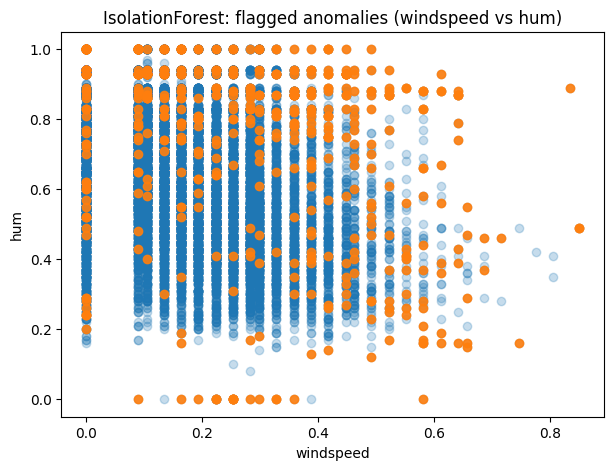

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(hour['windspeed'], hour['hum'], alpha=0.25)
plt.scatter(hour.loc[hour['anomaly_iforest']==1, 'windspeed'],
            hour.loc[hour['anomaly_iforest']==1, 'hum'], alpha=0.9)
plt.xlabel('windspeed')
plt.ylabel('hum')
plt.title('IsolationForest: flagged anomalies (windspeed vs hum)')
plt.show()

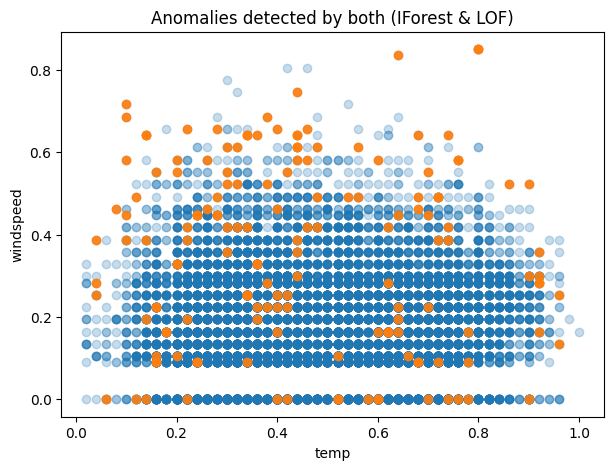

In [39]:
hour['anomaly_both'] = ((hour['anomaly_iforest']==1) & (hour['anomaly_lof']==1)).astype(int)

plt.figure(figsize=(7,5))
plt.scatter(hour['temp'], hour['windspeed'], alpha=0.25)
plt.scatter(hour.loc[hour['anomaly_both']==1, 'temp'],
            hour.loc[hour['anomaly_both']==1, 'windspeed'], alpha=0.9)
plt.xlabel('temp')
plt.ylabel('windspeed')
plt.title('Anomalies detected by both (IForest & LOF)')
plt.show()

оценим качество через Precision, Recall, F1, ROC-AUC

создадим псевдометку анамолии погоды (из нашего шага 2)

In [40]:
hour['pseudo_weather_anomaly'] = ((hour['has_windspeed_outlier']==1) | (hour['has_hum_outlier']==1)).astype(int)
hour['pseudo_weather_anomaly'].mean()

np.float64(0.02088727774900742)

метрики для IForest и LOF

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_true = hour['pseudo_weather_anomaly'].values

pred_if = hour['anomaly_iforest'].values
pred_lof = hour['anomaly_lof'].values

score_if = hour['iforest_score'].values
score_lof = hour['lof_score'].values

metrics = pd.DataFrame({
    'method': ['IsolationForest', 'LOF'],
    'precision': [precision_score(y_true, pred_if, zero_division=0),
                  precision_score(y_true, pred_lof, zero_division=0)],
    'recall':    [recall_score(y_true, pred_if, zero_division=0),
                  recall_score(y_true, pred_lof, zero_division=0)],
    'f1':        [f1_score(y_true, pred_if, zero_division=0),
                  f1_score(y_true, pred_lof, zero_division=0)],
    'roc_auc':   [roc_auc_score(y_true, score_if),
                  roc_auc_score(y_true, score_lof)]})
metrics

method  precision    recall        f1   roc_auc
0  IsolationForest   0.204981  0.294766  0.241808  0.904865
1              LOF   0.247126  0.355372  0.291525  0.905768

сравним методы по параметрам: какие точки определяются стабильно, где есть расхождения и почему.

пересечения

In [42]:
summary = pd.DataFrame({
    'flagged_%': [
        hour['anomaly_iforest'].mean()*100,
        hour['anomaly_lof'].mean()*100,
        hour['anomaly_both'].mean()*100]}, index=['IForest', 'LOF', 'Both'])
summary

flagged_%
IForest   3.003625
LOF       3.003625
Both      0.880373

расходятся

In [43]:
diff_if_only = ((hour['anomaly_iforest']==1) & (hour['anomaly_lof']==0)).sum()
diff_lof_only = ((hour['anomaly_iforest']==0) & (hour['anomaly_lof']==1)).sum()

diff_if_only, diff_lof_only

(np.int64(369), np.int64(369))

**вывод по этому шагу:**

для поиска сложных выбросов были использованы алгоритмы Isolation Forest и LOF и оба метода выделили около 3% наблюдений как аномальные, что соответствует редким условиям в данных.

также оба метода хорошо ранжируют аномалии (ROC-AUC около 0.9), при этом LOF немного лучше совпадает со статистическими выбросами;методы находят разные точки из-за различий в логике поиска аномалий.



### **Генерация признаков и отбор переменных**

train / test split

In [44]:
from sklearn.model_selection import train_test_split

X = hour.drop(columns=['cnt', 'casual', 'registered', 'dteday'])
y = hour['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

target Encoding (без утечки)

In [45]:
!pip -q install category-encoders

In [46]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['hr'])

X_train_te = te.fit_transform(X_train, y_train)
X_test_te = te.transform(X_test)

используем Label Encoding для остальных категориальных признаков

In [47]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['season', 'weathersit', 'weekday', 'mnth']

X_train_enc = X_train_te.copy()
X_test_enc = X_test_te.copy()

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])
    label_encoders[col] = le

мы использовали label encoding для категориальных признаков, тк модель random forest корректно работает с целочисленными категориями, этот метод не увеличивает размерность данных и не ухудшает качество модели по сравнению например с one-hot encoding.

обучим модельку и зафиксируем метрики

In [48]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1)

rf.fit(X_train_enc, y_train)
pred = rf.predict(X_test_enc)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

rmse, mae, r2

(np.float64(42.11585034890469), 26.043255178365936, 0.9439847841619792)

после применения target encoding для признака hr и label encoding для остальных категориальных переменных качество модели улучшилось по сравнению с baseline; модель random forest показала значения RMSE = 42.2, MAE = 26.1 и R^2 = 0.94, что подтверждает корректность выбранных способов кодирования и их пользу для задачи прогнозирования.

координат у нас нет, значит нужно найти похожие наблюдения по признакам из прошлого и построить признаки на их основе

посмотрим на логику признаков: спрос на велосипеды сильно зависит от предыдущих часов, повторяется по часам суток, имеет тенденцию "если час назад было много аренд - сейчас тоже вероятно много"

ближайшие соседи по времени

In [49]:
hour = hour.sort_values(['dteday', 'hr']).reset_index(drop=True)

hour['cnt_lag_1'] = hour['cnt'].shift(1)
hour['cnt_lag_3'] = hour['cnt'].shift(3)
hour['cnt_lag_24'] = hour['cnt'].shift(24)

посмотрим на окрестность (агрегаты по соседям)

In [50]:
hour['cnt_roll_3'] = hour['cnt'].shift(1).rolling(window=3).mean()
hour['cnt_roll_6'] = hour['cnt'].shift(1).rolling(window=6).mean()

средний спрос для "похожих наблюдений"

In [51]:
hour['cnt_mean_same_hour'] = (hour.groupby('hr')['cnt'].transform(lambda x: x.shift(1).expanding().mean()))

обработка пропусков

In [52]:
lag_cols = [
    'cnt_lag_1', 'cnt_lag_3', 'cnt_lag_24',
    'cnt_roll_3', 'cnt_roll_6', 'cnt_mean_same_hour']
hour[lag_cols] = hour[lag_cols].fillna(hour[lag_cols].median())

обработаем временные признаки

развернём их через синус/косинус

часы суток

In [53]:
hour['hr_sin'] = np.sin(2 * np.pi * hour['hr'] / 24)
hour['hr_cos'] = np.cos(2 * np.pi * hour['hr'] / 24)

дни недели

In [54]:
hour['weekday_sin'] = np.sin(2 * np.pi * hour['weekday'] / 7)
hour['weekday_cos'] = np.cos(2 * np.pi * hour['weekday'] / 7)

месяцы

In [55]:
hour['mnth_sin'] = np.sin(2 * np.pi * hour['mnth'] / 12)
hour['mnth_cos'] = np.cos(2 * np.pi * hour['mnth'] / 12)

контекстные временные признаки

выходной день

In [56]:
hour['is_weekend'] = (hour['weekday'].isin([0, 6])).astype(int)

часы пик

In [57]:
hour['is_peak_hour'] = (
    ((hour['hr'] >= 7) & (hour['hr'] <= 9)) |
    ((hour['hr'] >= 17) & (hour['hr'] <= 19))).astype(int)

рабочий час в рабочий день

In [58]:
hour['is_working_peak'] = (
    (hour['workingday'] == 1) &
    (hour['is_peak_hour'] == 1)).astype(int)

**мини-вывод по шагу:** временные признаки (часы, дни недели, месяцы) были закодированы с помощью sin/cos, чтобы корректно учитывать их цикличность; дополнительно добавлены флаги выходных и часов пик, отражающие типичное поведение пользователей и различия в спросе в разное время.

### Сформируем контекстные признаки, отражающие специфику нашей задачи


время до пикового часа


In [59]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

morning_peak_start = 7
morning_peak_end = 9
evening_peak_start = 17
evening_peak_end = 19

hour['hours_to_morning_peak'] = 0
hour['hours_to_evening_peak'] = 0

for idx in hour.index:
    current_hr = hour.loc[idx, 'hr']
    
    if current_hr < morning_peak_start:
        hour.loc[idx, 'hours_to_morning_peak'] = morning_peak_start - current_hr
    elif current_hr > morning_peak_end:
        hour.loc[idx, 'hours_to_morning_peak'] = 24 - current_hr + morning_peak_start
    
    if current_hr < evening_peak_start:
        hour.loc[idx, 'hours_to_evening_peak'] = evening_peak_start - current_hr
    elif current_hr > evening_peak_end:
        hour.loc[idx, 'hours_to_evening_peak'] = 24 - current_hr + evening_peak_start

hour['min_hours_to_peak'] = hour[['hours_to_morning_peak', 'hours_to_evening_peak']].min(axis=1)


In [60]:
print('распределение часов до ближайшего пика:')
print(hour['min_hours_to_peak'].describe())
print('\nсредний спрос в зависимости от часов до пика:')
print(hour.groupby('min_hours_to_peak')['cnt'].mean().head(10))


распределение часов до ближайшего пика:
count    17379.000000
mean         3.917659
std          3.410321
min          0.000000
25%          0.000000
50%          3.000000
75%          7.000000
max         11.000000
Name: min_hours_to_peak, dtype: float64

средний спрос в зависимости от часов до пика:
min_hours_to_peak
0    331.584841
1    194.419244
2    136.521438
3    126.283310
4    135.408836
5    139.130977
6    120.940041
7    113.824501
8     87.831044
9    131.335165
Name: cnt, dtype: float64


время до праздника


In [61]:
hour = hour.sort_values('dteday').reset_index(drop=True)

hour['days_to_holiday'] = 0
hour['days_after_holiday'] = 0

holiday_dates = hour[hour['holiday'] == 1]['dteday'].dt.date.unique()

if len(holiday_dates) > 0:
    for idx in hour.index:
        current_date = hour.loc[idx, 'dteday'].date()
        
        prev_holidays = [h for h in holiday_dates if h < current_date]
        if len(prev_holidays) > 0:
            days_diff = (current_date - max(prev_holidays)).days
            hour.loc[idx, 'days_after_holiday'] = min(days_diff, 7) if days_diff <= 7 else 0
        
        next_holidays = [h for h in holiday_dates if h > current_date]
        if len(next_holidays) > 0:
            days_diff = (min(next_holidays) - current_date).days
            hour.loc[idx, 'days_to_holiday'] = min(days_diff, 7) if days_diff <= 7 else 0

hour['near_holiday'] = (((hour['days_to_holiday'] > 0) & (hour['days_to_holiday'] <= 2)) | 
                        ((hour['days_after_holiday'] > 0) & (hour['days_after_holiday'] <= 2))).astype(int)


In [62]:
print('средний спрос в зависимости от дней до праздника:')
print(hour.groupby('days_to_holiday')['cnt'].mean().head(8))
print('\nсредний спрос в зависимости от дней после праздника:')
print(hour.groupby('days_after_holiday')['cnt'].mean().head(8))
print('\nсредний спрос около праздника:', hour[hour['near_holiday'] == 1]['cnt'].mean())
print('средний спрос вдали от праздника:', hour[hour['near_holiday'] == 0]['cnt'].mean())


средний спрос в зависимости от дней до праздника:
days_to_holiday
0    192.227086
1    164.349301
2    176.831349
3    185.069583
4    187.177291
5    181.412826
6    182.566000
7    172.451292
Name: cnt, dtype: float64

средний спрос в зависимости от дней после праздника:
days_after_holiday
0    194.119178
1    157.749482
2    163.768463
3    172.438247
4    174.418327
5    178.302187
6    174.669323
7    173.755274
Name: cnt, dtype: float64

средний спрос около праздника: 165.763197586727
средний спрос вдали от праздника: 192.52605588044185


погодные условия и комфорт для велопроката


In [63]:
hour['is_good_weather'] = (hour['weathersit'] == 1).astype(int)
hour['is_bad_weather'] = (hour['weathersit'] >= 3).astype(int)

hour['is_cold'] = (hour['temp'] < 0.3).astype(int)
hour['is_comfortable_temp'] = ((hour['temp'] >= 0.3) & (hour['temp'] <= 0.7)).astype(int)
hour['is_hot'] = (hour['temp'] > 0.7).astype(int)

hour['is_high_humidity'] = (hour['hum'] > 0.7).astype(int)
hour['is_high_wind'] = (hour['windspeed'] > 0.5).astype(int)

hour['is_ideal_conditions'] = (
    (hour['is_good_weather'] == 1) &
    (hour['is_comfortable_temp'] == 1) &
    (hour['is_high_humidity'] == 0) &
    (hour['is_high_wind'] == 0)
).astype(int)

hour['comfort_index'] = (
    hour['temp'] * 0.3 +
    (1 - hour['hum']) * 0.2 +
    (1 - hour['windspeed']) * 0.2 +
    hour['is_good_weather'] * 0.3
)

In [64]:
print('средний спрос при идеальных условиях:', hour[hour['is_ideal_conditions'] == 1]['cnt'].mean())
print('средний спрос при неидеальных условиях:', hour[hour['is_ideal_conditions'] == 0]['cnt'].mean())
print('\nсредний спрос по категориям температуры:')
print('холодно:', hour[hour['is_cold'] == 1]['cnt'].mean())
print('комфортно:', hour[hour['is_comfortable_temp'] == 1]['cnt'].mean())
print('жарко:', hour[hour['is_hot'] == 1]['cnt'].mean())
print('\nкорреляция индекса комфорта со спросом:', hour['comfort_index'].corr(hour['cnt']))


средний спрос при идеальных условиях: 241.1063122923588
средний спрос при неидеальных условиях: 169.6657645466847

средний спрос по категориям температуры:
холодно: 77.34180299338671
комфортно: 187.17731156416548
жарко: 319.49832402234637

корреляция индекса комфорта со спросом: 0.28389394299862786


сезонные и временные признаки


In [65]:
hour['is_summer'] = (hour['season'] == 3).astype(int)
hour['is_winter'] = (hour['season'] == 1).astype(int)
hour['is_warm_month'] = hour['mnth'].isin([5, 6, 7, 8, 9]).astype(int)
hour['is_cold_month'] = hour['mnth'].isin([11, 12, 1, 2]).astype(int)

hour['is_morning'] = ((hour['hr'] >= 6) & (hour['hr'] < 12)).astype(int)
hour['is_afternoon'] = ((hour['hr'] >= 12) & (hour['hr'] < 18)).astype(int)
hour['is_evening'] = ((hour['hr'] >= 18) & (hour['hr'] < 24)).astype(int)
hour['is_night'] = ((hour['hr'] >= 0) & (hour['hr'] < 6)).astype(int)

hour['is_monday'] = (hour['weekday'] == 1).astype(int)
hour['is_friday'] = (hour['weekday'] == 5).astype(int)


In [66]:
print('средний спрос по сезонам:')
print('лето:', hour[hour['is_summer'] == 1]['cnt'].mean())
print('зима:', hour[hour['is_winter'] == 1]['cnt'].mean())
print('\nсредний спрос по времени суток:')
print('утро:', hour[hour['is_morning'] == 1]['cnt'].mean())
print('день:', hour[hour['is_afternoon'] == 1]['cnt'].mean())
print('вечер:', hour[hour['is_evening'] == 1]['cnt'].mean())
print('ночь:', hour[hour['is_night'] == 1]['cnt'].mean())


средний спрос по сезонам:
лето: 236.01623665480426
зима: 111.11456859971712

средний спрос по времени суток:
утро: 208.1006880733945
день: 295.4838857142857
вечер: 225.75755494505495
ночь: 24.908559401309635


взаимодействия признаков


дополнительные контекстные признаки


In [67]:
if hour['dteday'].dtype == 'object':
    hour['dteday'] = pd.to_datetime(hour['dteday'])

hour['day_of_year'] = hour['dteday'].dt.dayofyear
hour['week_of_year'] = hour['dteday'].dt.isocalendar().week
hour['quarter'] = hour['dteday'].dt.quarter

hour['is_month_start'] = (hour['dteday'].dt.day <= 3).astype(int)
hour['is_month_end'] = (hour['dteday'].dt.day >= 28).astype(int)

hour['temp_squared'] = hour['temp'] ** 2
hour['hum_squared'] = hour['hum'] ** 2
hour['windspeed_squared'] = hour['windspeed'] ** 2

hour['temp_hum_interaction'] = hour['temp'] * hour['hum']
hour['temp_wind_interaction'] = hour['temp'] * hour['windspeed']
hour['hum_wind_interaction'] = hour['hum'] * hour['windspeed']

hour['weather_temp_interaction'] = hour['weathersit'] * hour['temp']
hour['weather_hum_interaction'] = hour['weathersit'] * hour['hum']

hour['season_temp_interaction'] = hour['season'] * hour['temp']
hour['season_weather_interaction'] = hour['season'] * hour['weathersit']

hour['hr_temp_interaction'] = hour['hr'] * hour['temp']
hour['hr_weather_interaction'] = hour['hr'] * hour['weathersit']

hour['workingday_temp_interaction'] = hour['workingday'] * hour['temp']
hour['workingday_weather_interaction'] = hour['workingday'] * hour['weathersit']

hour['is_weekend_temp_interaction'] = hour['is_weekend'] * hour['temp']
hour['is_weekend_weather_interaction'] = hour['is_weekend'] * hour['weathersit']

hour['peak_hour_temp_interaction'] = hour['is_peak_hour'] * hour['temp']
hour['peak_hour_weather_interaction'] = hour['is_peak_hour'] * hour['weathersit']

hour_sorted = hour.sort_values('dteday').reset_index(drop=True)
hour_sorted['rolling_temp_3h'] = hour_sorted.groupby(hour_sorted['dteday'].dt.date)['temp'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
hour_sorted['rolling_hum_3h'] = hour_sorted.groupby(hour_sorted['dteday'].dt.date)['hum'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

hour_sorted['temp_change'] = hour_sorted.groupby(hour_sorted['dteday'].dt.date)['temp'].diff().fillna(0)
hour_sorted['hum_change'] = hour_sorted.groupby(hour_sorted['dteday'].dt.date)['hum'].diff().fillna(0)

hour_sorted['is_temp_increasing'] = (hour_sorted['temp_change'] > 0).astype(int)
hour_sorted['is_hum_increasing'] = (hour_sorted['hum_change'] > 0).astype(int)

hour = hour_sorted


In [68]:
new_features = [
    'day_of_year', 'week_of_year', 'quarter',
    'is_month_start', 'is_month_end',
    'temp_squared', 'hum_squared', 'windspeed_squared',
    'temp_hum_interaction', 'temp_wind_interaction', 'hum_wind_interaction',
    'weather_temp_interaction', 'weather_hum_interaction',
    'season_temp_interaction', 'season_weather_interaction',
    'hr_temp_interaction', 'hr_weather_interaction',
    'workingday_temp_interaction', 'workingday_weather_interaction',
    'is_weekend_temp_interaction', 'is_weekend_weather_interaction',
    'peak_hour_temp_interaction', 'peak_hour_weather_interaction',
    'rolling_temp_3h', 'rolling_hum_3h',
    'temp_change', 'hum_change',
    'is_temp_increasing', 'is_hum_increasing'
]

existing_features = [f for f in new_features if f in hour.columns]

print(f'создано дополнительных признаков: {len(existing_features)} из {len(new_features)}')
if len(existing_features) > 0:
    print(f'\nпримеры значений:')
    print(hour[existing_features[:5]].head())
else:
    print('признаки не созданы')


создано дополнительных признаков: 29 из 29

примеры значений:
   day_of_year  week_of_year  quarter  is_month_start  is_month_end
0            1            52        1               1             0
1            1            52        1               1             0
2            1            52        1               1             0
3            1            52        1               1             0
4            1            52        1               1             0


In [69]:
hour['good_weather_weekend'] = ((hour['is_good_weather'] == 1) & (hour['is_weekend'] == 1)).astype(int)
hour['ideal_conditions_weekend'] = ((hour['is_ideal_conditions'] == 1) & (hour['is_weekend'] == 1)).astype(int)
hour['good_weather_work_peak'] = ((hour['is_good_weather'] == 1) & (hour['workingday'] == 1) & (hour['is_peak_hour'] == 1)).astype(int)
hour['summer_weekend'] = ((hour['is_summer'] == 1) & (hour['is_weekend'] == 1)).astype(int)
hour['bad_weather_workday'] = ((hour['is_bad_weather'] == 1) & (hour['workingday'] == 1)).astype(int)
hour['warm_month_weekend'] = ((hour['is_warm_month'] == 1) & (hour['is_weekend'] == 1)).astype(int)


In [70]:
print('средний спрос при взаимодействиях:')
print('хорошая погода + выходной:', hour[hour['good_weather_weekend'] == 1]['cnt'].mean())
print('идеальные условия + выходной:', hour[hour['ideal_conditions_weekend'] == 1]['cnt'].mean())
print('хорошая погода + рабочий день + пик:', hour[hour['good_weather_work_peak'] == 1]['cnt'].mean())
print('лето + выходной:', hour[hour['summer_weekend'] == 1]['cnt'].mean())
print('плохая погода + рабочий день:', hour[hour['bad_weather_workday'] == 1]['cnt'].mean())


средний спрос при взаимодействиях:
хорошая погода + выходной: 200.9517441860465
идеальные условия + выходной: 253.5242718446602
хорошая погода + рабочий день + пик: 432.52831196581195
лето + выходной: 229.72597299444004
плохая погода + рабочий день: 112.75047984644914


дополнительные признаки


In [71]:
hour['temp_feel_diff'] = abs(hour['temp'] - hour['atemp'])

hour['days_from_weekend'] = 0
for idx in hour.index:
    current_weekday = hour.loc[idx, 'weekday']
    if current_weekday == 0:
        hour.loc[idx, 'days_from_weekend'] = 0
    elif current_weekday == 6:
        hour.loc[idx, 'days_from_weekend'] = 0
    elif current_weekday < 3:
        hour.loc[idx, 'days_from_weekend'] = current_weekday
    else:
        hour.loc[idx, 'days_from_weekend'] = 7 - current_weekday


In [72]:
context_features = [
    'hours_to_morning_peak', 'hours_to_evening_peak', 'min_hours_to_peak',
    'days_to_holiday', 'days_after_holiday', 'near_holiday',
    'is_good_weather', 'is_bad_weather', 'is_cold', 'is_comfortable_temp', 'is_hot',
    'is_high_humidity', 'is_high_wind', 'is_ideal_conditions', 'comfort_index',
    'is_summer', 'is_winter', 'is_warm_month', 'is_cold_month',
    'is_morning', 'is_afternoon', 'is_evening', 'is_night',
    'is_monday', 'is_friday',
    'good_weather_weekend', 'ideal_conditions_weekend', 'good_weather_work_peak',
    'summer_weekend', 'bad_weather_workday', 'warm_month_weekend',
    'temp_feel_diff', 'days_from_weekend'
]

print(f'создано контекстных признаков: {len(context_features)}')
print(f'\nпримеры значений первых признаков:')
print(hour[context_features[:5]].head())


создано контекстных признаков: 33

примеры значений первых признаков:
   hours_to_morning_peak  hours_to_evening_peak  min_hours_to_peak  \
0                      7                     17                  7   
1                      1                     11                  1   
2                      0                      8                  0   
3                      0                      9                  0   
4                      0                     10                  0   

   days_to_holiday  days_after_holiday  
0                0                   0  
1                0                   0  
2                0                   0  
3                0                   0  
4                0                   0  


**мини-вывод по шагу:** созданы контекстные признаки, специфичные для задачи прогноза спроса на велопрокат. 

**гипотезы для признаков:**

**время до пикового часа:**
- `hours_to_morning_peak`, `hours_to_evening_peak`, `min_hours_to_peak` - спрос может меняться в зависимости от близости к часам пик, когда люди едут на работу или с работы. чем ближе к пику, тем выше спрос.

**время до праздника:**
- `days_to_holiday`, `days_after_holiday` - в дни перед праздником люди могут больше использовать велосипеды для подготовки или отдыха, а после праздника спрос может падать из-за усталости или возвращения к обычному ритму.
- `near_holiday` - дни около праздника могут иметь особый паттерн спроса, отличающийся от обычных дней.

**погодные условия:**
- `is_good_weather`, `is_bad_weather` - хорошая погода увеличивает желание кататься, а плохая снижает.
- `is_cold`, `is_comfortable_temp`, `is_hot` - комфортная температура оптимальна для велопрогулок, слишком высокие или низкие температуры снижают спрос.
- `is_high_humidity`, `is_high_wind` - высокая влажность и сильный ветер делают поездку менее комфортной.
- `is_ideal_conditions` - сочетание всех благоприятных факторов должно максимально увеличивать спрос.
- `comfort_index` - комплексный показатель комфорта, объединяющий все погодные факторы.

**сезонные признаки:**
- `is_summer`, `is_winter` - летом спрос максимальный из-за теплой погоды, зимой минимальный.
- `is_warm_month`, `is_cold_month` - в тёплые месяцы (май-сентябрь) высокий спрос, в холодные (ноябрь-февраль) низкий.

**время суток:**
- `is_morning`, `is_afternoon`, `is_evening`, `is_night` - разные периоды суток имеют разную привлекательность для велопроката в зависимости от целей использования (работа, досуг).

**дни недели:**
- `is_monday`, `is_friday` - понедельник и пятница выделяются из остальных дней, т.к. это начало и конец рабочей недели

**взаимодействия:**
- `good_weather_weekend` - хорошая погода в выходной создаёт идеальные условия для прогулочных поездок.
- `ideal_conditions_weekend` - идеальные условия в выходной должны давать максимальный спрос.
- `good_weather_work_peak` - хорошая погода в рабочий день в час пик влияет на использование велосипедов для поездок на работу.
- `summer_weekend`, `warm_month_weekend` - тёплое время года + выходной = пик использования как досуг.
- `bad_weather_workday` - из-за плохой погоды в будний день люди могут быть вынуждены использовать велосипеды.

**дополнительные:**
- `temp_feel_diff` - разница между реальной температурой и "ощущается, как" может влиять на комфорт пользователя.
- `days_from_weekend` - близость к выходным может влиять на спрос, так как люди планируют активность на выходные.


### Отберем признаки

подготовка данных для отбора признаков


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFECV
from sklearn.metrics import mean_squared_error, r2_score


numeric_cols = hour.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['instant', 'cnt', 'casual', 'registered']]

X = hour[numeric_cols].copy()
y = hour['cnt'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'всего признаков: {len(numeric_cols)}')
print(f'размер обучающей выборки: {X_train.shape}')
print(f'размер тестовой выборки: {X_test.shape}')


всего признаков: 99
размер обучающей выборки: (13903, 99)
размер тестовой выборки: (3476, 99)


отбор через фильтры: корреляции


In [74]:
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print('топ-20 признаков по корреляции с целевой переменной:')
print(correlations.head(20))

threshold_corr = 0.1
selected_by_corr = correlations[correlations > threshold_corr].index.tolist()
print(f'\nпризнаков с корреляцией > {threshold_corr}: {len(selected_by_corr)}')


топ-20 признаков по корреляции с целевой переменной:
cnt_lag_1                     0.844951
cnt_lag_24                    0.817339
cnt_mean_same_hour            0.792108
cnt_roll_3                    0.671473
hr_temp_interaction           0.544406
peak_hour_temp_interaction    0.533309
is_night                      0.519073
is_working_peak               0.514971
hours_to_evening_peak         0.505283
cnt_roll_6                    0.475994
good_weather_work_peak        0.460473
is_peak_hour                  0.453053
hr_cos                        0.411650
hr_sin                        0.409282
temp                          0.409075
cnt_lag_3                     0.406891
atemp                         0.404729
temp_squared                  0.403850
hr                            0.393527
rolling_temp_3h               0.373881
dtype: float64

признаков с корреляцией > 0.1: 63


отбор через фильтры: f-статистика (anova)


In [75]:
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X_train, y_train)

feature_scores = pd.DataFrame({
    'feature': X_train.columns,
    'f_score': selector_f.scores_,
    'p_value': selector_f.pvalues_
}).sort_values('f_score', ascending=False)

print('топ-20 признаков по f-статистике:')
print(feature_scores.head(20))

threshold_p = 0.05
selected_by_f = feature_scores[feature_scores['p_value'] < threshold_p]['feature'].tolist()
print(f'\nпризнаков с p-value < {threshold_p}: {len(selected_by_f)}')


топ-20 признаков по f-статистике:
                       feature       f_score  p_value
22                   cnt_lag_1  34694.168237      0.0
24                  cnt_lag_24  27974.844469      0.0
27          cnt_mean_same_hour  23410.576353      0.0
25                  cnt_roll_3  11413.840832      0.0
77         hr_temp_interaction   5855.335747      0.0
83  peak_hour_temp_interaction   5525.160824      0.0
59                    is_night   5126.771762      0.0
36             is_working_peak   5016.959071      0.0
38       hours_to_evening_peak   4765.856603      0.0
26                  cnt_roll_6   4072.187681      0.0
93      good_weather_work_peak   3740.646763      0.0
35                is_peak_hour   3590.189913      0.0
29                      hr_cos   2836.219275      0.0
28                      hr_sin   2797.131716      0.0
8                         temp   2793.742985      0.0
23                   cnt_lag_3   2758.086959      0.0
9                        atemp   2723.127542    

отбор через встроенные методы: l1-регуляризация (lasso)


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42, max_iter=2000)
lasso.fit(X_train_scaled, y_train)

lasso_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print('топ-20 признаков по важности в lasso:')
print(lasso_coef.head(20))

selected_by_lasso = lasso_coef[lasso_coef['coefficient'] != 0]['feature'].tolist()
print(f'\nпризнаков с ненулевыми коэффициентами: {len(selected_by_lasso)}')
print(f'альфа (регуляризация): {lasso.alpha_:.6f}')


топ-20 признаков по важности в lasso:
                        feature  coefficient
22                    cnt_lag_1   183.272433
25                   cnt_roll_3  -141.459611
38        hours_to_evening_peak   113.240066
37        hours_to_morning_peak   101.824576
39            min_hours_to_peak   -99.567028
23                    cnt_lag_3    85.896490
27           cnt_mean_same_hour    60.894128
29                       hr_cos    53.831232
26                   cnt_roll_6   -39.082767
36              is_working_peak    35.407892
24                   cnt_lag_24    30.988812
28                       hr_sin    30.208177
57                 is_afternoon    28.443562
77          hr_temp_interaction    18.123839
81  is_weekend_temp_interaction    16.510804
35                 is_peak_hour   -15.367642
59                     is_night   -13.271237
56                   is_morning    11.287822
58                   is_evening   -11.078927
78       hr_weather_interaction   -10.123491

признаков с нену

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+05, tolerance: 4.609e+04
  model = cd_fast.enet_coordinate_descent(


отбор через встроенные методы: feature importances из random forest


In [77]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print('топ-20 признаков по важности в random forest:')
print(rf_importances.head(20))

threshold_importance = rf_importances['importance'].quantile(0.5)
selected_by_rf = rf_importances[rf_importances['importance'] > threshold_importance]['feature'].tolist()
print(f'\nпризнаков с важностью > медианы ({threshold_importance:.6f}): {len(selected_by_rf)}')


топ-20 признаков по важности в random forest:
                        feature  importance
22                    cnt_lag_1    0.681670
27           cnt_mean_same_hour    0.089482
24                   cnt_lag_24    0.072173
28                       hr_sin    0.031390
37        hours_to_morning_peak    0.016086
29                       hr_cos    0.015074
36              is_working_peak    0.009331
38        hours_to_evening_peak    0.008628
79  workingday_temp_interaction    0.005699
26                   cnt_roll_6    0.005681
23                    cnt_lag_3    0.004838
25                   cnt_roll_3    0.004790
39            min_hours_to_peak    0.004540
3                            hr    0.003679
17                iforest_score    0.003637
78       hr_weather_interaction    0.003374
77          hr_temp_interaction    0.002496
81  is_weekend_temp_interaction    0.001878
51                comfort_index    0.001734
74      weather_hum_interaction    0.001674

признаков с важностью > медиа

отбор через обёртки: rfecv


In [78]:
rf_estimator = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1, max_depth=10)

rfecv = RFECV(estimator=rf_estimator, step=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, min_features_to_select=10)
rfecv.fit(X_train, y_train)

selected_by_rfecv = X_train.columns[rfecv.support_].tolist()

print(f'оптимальное количество признаков по rfecv: {rfecv.n_features_}')
print(f'\nотобранные признаки ({len(selected_by_rfecv)}):')
print(selected_by_rfecv)

print(f'\nважность признаков (топ-10):')
rfecv_ranking = pd.DataFrame({
    'feature': X_train.columns,
    'ranking': rfecv.ranking_
}).sort_values('ranking')
print(rfecv_ranking.head(10))


оптимальное количество признаков по rfecv: 29

отобранные признаки (29):
['yr', 'hr', 'weekday', 'iforest_score', 'cnt_lag_1', 'cnt_lag_3', 'cnt_lag_24', 'cnt_roll_3', 'cnt_roll_6', 'cnt_mean_same_hour', 'hr_sin', 'hr_cos', 'weekday_sin', 'mnth_cos', 'is_working_peak', 'hours_to_morning_peak', 'hours_to_evening_peak', 'min_hours_to_peak', 'comfort_index', 'day_of_year', 'temp_hum_interaction', 'weather_hum_interaction', 'hr_temp_interaction', 'hr_weather_interaction', 'workingday_temp_interaction', 'is_weekend_temp_interaction', 'peak_hour_temp_interaction', 'rolling_temp_3h', 'good_weather_work_peak']

важность признаков (топ-10):
                 feature  ranking
70  temp_hum_interaction        1
23             cnt_lag_3        1
24            cnt_lag_24        1
26            cnt_roll_6        1
27    cnt_mean_same_hour        1
28                hr_sin        1
29                hr_cos        1
30           weekday_sin        1
33              mnth_cos        1
36       is_working_

сравнение методов отбора


In [79]:
all_selected = {
    'correlation': set(selected_by_corr),
    'f_statistic': set(selected_by_f),
    'lasso': set(selected_by_lasso),
    'random_forest': set(selected_by_rf),
    'rfecv': set(selected_by_rfecv)
}

print('количество отобранных признаков по методам:')
for method, features in all_selected.items():
    print(f'{method}: {len(features)}')

common_features = set.intersection(*all_selected.values())
print(f'\nпризнаков, отобранных всеми методами: {len(common_features)}')
if len(common_features) > 0:
    print('общие признаки:', list(common_features)[:10])

union_features = set.union(*all_selected.values())
print(f'\nвсего уникальных признаков, отобранных хотя бы одним методом: {len(union_features)}')


количество отобранных признаков по методам:
correlation: 63
f_statistic: 91
lasso: 74
random_forest: 49
rfecv: 29

признаков, отобранных всеми методами: 23
общие признаки: ['peak_hour_temp_interaction', 'weather_hum_interaction', 'cnt_lag_3', 'day_of_year', 'is_working_peak', 'hr_sin', 'hours_to_morning_peak', 'cnt_lag_24', 'cnt_mean_same_hour', 'hr_weather_interaction']

всего уникальных признаков, отобранных хотя бы одним методом: 95


проверка нестабильности признаков во времени


In [80]:
hour['year_month'] = hour['dteday'].dt.to_period('M')
periods = hour['year_month'].unique()[:6]

period_importances = {}
for period in periods:
    period_data = hour[hour['year_month'] == period]
    if len(period_data) < 100:
        continue
    
    X_period = period_data[numeric_cols]
    y_period = period_data['cnt']
    
    rf_period = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf_period.fit(X_period, y_period)
    
    period_importances[str(period)] = pd.Series(rf_period.feature_importances_, index=numeric_cols)

unstable_features = pd.DataFrame()
if len(period_importances) > 0:
    period_df = pd.DataFrame(period_importances)
    period_df['std'] = period_df.std(axis=1)
    period_df['mean'] = period_df.mean(axis=1)
    period_df['cv'] = period_df['std'] / (period_df['mean'] + 1e-10)
    
    unstable_features = period_df[period_df['cv'] > 0.5].sort_values('cv', ascending=False)
    print(f'нестабильных признаков (cv > 0.5): {len(unstable_features)}')
    if len(unstable_features) > 0:
        print('\nтоп-10 нестабильных признаков:')
        print(unstable_features[['mean', 'std', 'cv']].head(10))


нестабильных признаков (cv > 0.5): 67

топ-10 нестабильных признаков:
                          mean       std        cv
is_winter             0.000014  0.000028  2.029271
summer_weekend        0.000008  0.000016  2.029261
has_hum_outlier       0.000006  0.000013  2.029254
is_summer             0.000006  0.000012  2.029250
is_working_peak       0.072826  0.125632  1.725096
good_weather_weekend  0.002544  0.004373  1.718901
warm_month_weekend    0.000195  0.000328  1.675609
season                0.000026  0.000041  1.587512
anomaly_iforest       0.000038  0.000059  1.584080
days_after_holiday    0.000866  0.001369  1.580970


формирование финального набора признаков


In [81]:
final_features = list(union_features)

if len(unstable_features) > 0 and not unstable_features.empty:
    unstable_list = unstable_features.index.tolist()
    final_features = [f for f in final_features if f not in unstable_list]
    print(f'исключено нестабильных признаков: {len(unstable_list)}')

print(f'финальный набор признаков: {len(final_features)}')
print(f'\nпервые 20 признаков:')
print(final_features[:20])


исключено нестабильных признаков: 67
финальный набор признаков: 32

первые 20 признаков:
['quarter', 'temp_wind_interaction', 'mnth_sin', 'weathersit', 'hum_wind_interaction', 'temp_feel_diff', 'atemp', 'cnt_roll_6', 'mnth', 'temp_hum_interaction', 'is_hum_increasing', 'rolling_hum_3h', 'cnt_mean_same_hour', 'hr_weather_interaction', 'lof_score', 'temp_squared', 'is_cold_month', 'hum_change', 'weekday_sin', 'is_bad_weather']


проверка качества модели на отобранных признаках


In [82]:
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]

rf_final = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_final.fit(X_train_selected, y_train)

y_pred_train = rf_final.predict(X_train_selected)
y_pred_test = rf_final.predict(X_test_selected)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('метрики на обучающей выборке:')
print(f'mse: {mse_train:.2f}')
print(f'r2: {r2_train:.4f}')
print('\nметрики на тестовой выборке:')
print(f'mse: {mse_test:.2f}')
print(f'r2: {r2_test:.4f}')

rf_all = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_all.fit(X_train, y_train)
y_pred_all_test = rf_all.predict(X_test)
r2_all_test = r2_score(y_test, y_pred_all_test)

print(f'\nсравнение:')
print(f'r2 на всех признаках: {r2_all_test:.4f}')
print(f'r2 на отобранных признаках: {r2_test:.4f}')
print(f'разница: {r2_test - r2_all_test:.4f}')


метрики на обучающей выборке:
mse: 190.21
r2: 0.9943

метрики на тестовой выборке:
mse: 1325.30
r2: 0.9585

сравнение:
r2 на всех признаках: 0.9636
r2 на отобранных признаках: 0.9585
разница: -0.0052


**мини-вывод по шагу:** проведён отбор признаков тремя подходами - через фильтры (корреляции, f-статистика), через встроенные методы (l1-регуляризация, feature importances) и через обёртки (rfecv). проверена стабильность признаков во времени. сформирован финальный набор признаков, который отражает логику задачи и проверяет выдвинутые гипотезы. качество модели на отобранных признаках осталось на уровне с моделью на всех признаках, при этом набор стал более содержательным и подходящим под нашу задачу


# **Этап №3**

### Проинтерпретируем модели

подготовка данных и обучение моделей для интерпретации


In [83]:
!pip install shap
!pip install lime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.9/554.9 kB 4.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 12.4 MB/s  0:00:03 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [shap]4/5 [shap]]te]
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 9.6 MB/s  0:00:01 eta 0:00:01
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=e74347fe6e55dddd99a8c1ce38159dc493e1bb383a8febc7cc28668fa52d8cd5
  Stored in directory: /Users/dimazeitts/Library/Caches/pip/wheels/7c/04/5c/157dc9106512a6c7a30653ec064490c94a49e0fc8f63d19ab9
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [lime]4/5 [lime]t-image]


In [84]:
import shap
import lime

X_train_interp = X_train[final_features].fillna(0)
X_test_interp = X_test[final_features].fillna(0)

lr_model = LinearRegression()
lr_model.fit(X_train_interp, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_interp, y_train)

print('модели обучены')
print(f'линейная модель r2: {lr_model.score(X_test_interp, y_test):.4f}')
print(f'random forest r2: {rf_model.score(X_test_interp, y_test):.4f}')


модели обучены
линейная модель r2: 0.8336
random forest r2: 0.9585


глобальная интерпретация: shap для линейной модели


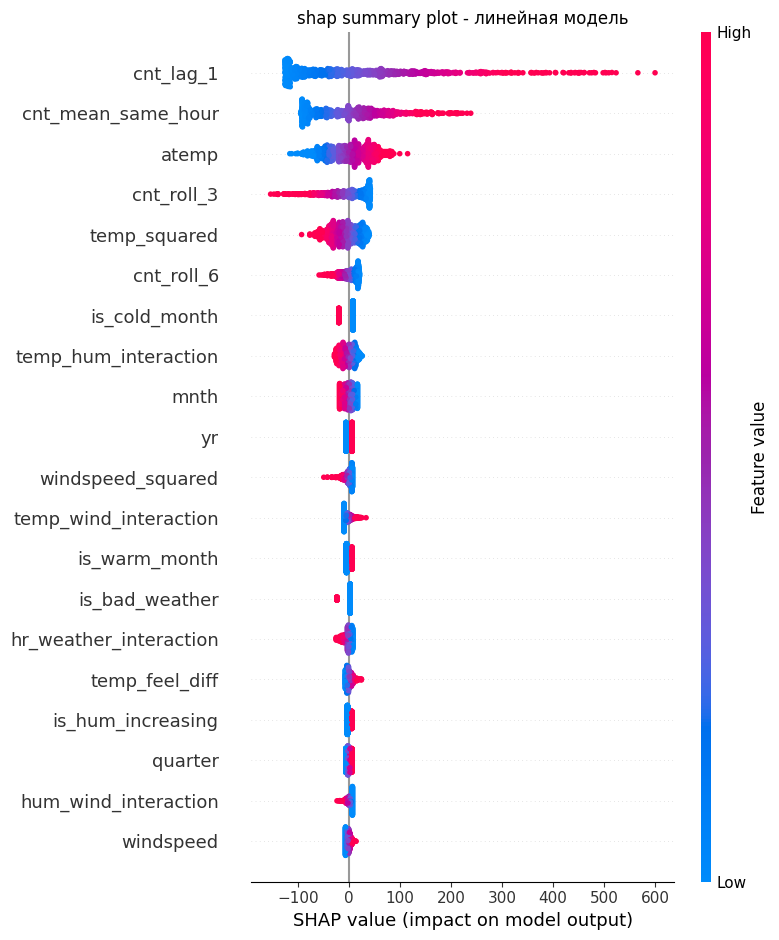

топ-10 признаков по важности (shap, линейная модель):
                 feature  mean_abs_shap
30             cnt_lag_1     105.687096
12    cnt_mean_same_hour      61.009996
6                  atemp      36.518624
22            cnt_roll_3      32.115039
15          temp_squared      23.103947
7             cnt_roll_6      13.935105
16         is_cold_month      11.932711
9   temp_hum_interaction      11.071818
8                   mnth       9.305587
23                    yr       5.922596


In [85]:
explainer_lr = shap.LinearExplainer(lr_model, X_train_interp)
shap_values_lr = explainer_lr.shap_values(X_test_interp[:1000])

shap.summary_plot(shap_values_lr, X_test_interp[:1000], feature_names=final_features, show=False)
plt.title('shap summary plot - линейная модель')
plt.tight_layout()
plt.show()

top_features_lr = pd.DataFrame({
    'feature': final_features,
    'mean_abs_shap': np.abs(shap_values_lr).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)

print('топ-10 признаков по важности (shap, линейная модель):')
print(top_features_lr.head(10))


глобальная интерпретация: shap для random forest


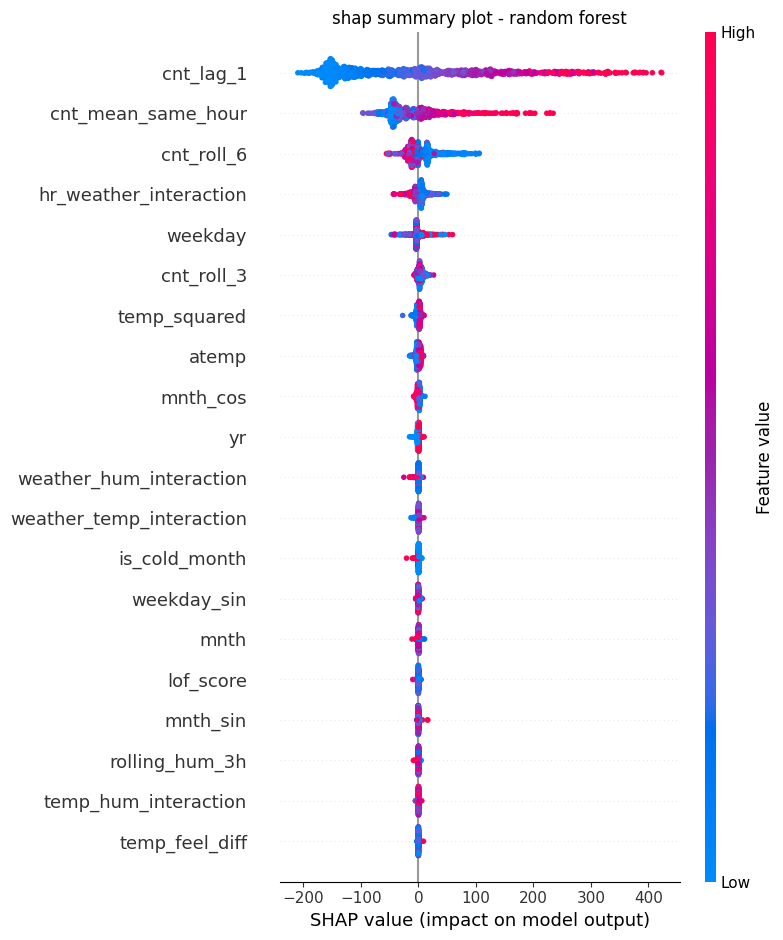

топ-10 признаков по важности (shap, random forest):
                   feature  mean_abs_shap
30               cnt_lag_1     117.899271
12      cnt_mean_same_hour      37.336065
7               cnt_roll_6      16.303668
13  hr_weather_interaction       8.273466
31                 weekday       6.048189
22              cnt_roll_3       3.863783
15            temp_squared       2.649951
6                    atemp       2.620774
28                mnth_cos       1.802552
23                      yr       1.322223


In [86]:
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_interp[:1000])

shap.summary_plot(shap_values_rf, X_test_interp[:1000], feature_names=final_features, show=False)
plt.title('shap summary plot - random forest')
plt.tight_layout()
plt.show()

top_features_rf = pd.DataFrame({
    'feature': final_features,
    'mean_abs_shap': np.abs(shap_values_rf).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False)

print('топ-10 признаков по важности (shap, random forest):')
print(top_features_rf.head(10))


сравнение ключевых признаков между моделями


In [87]:
top_10_lr = set(top_features_lr.head(10)['feature'])
top_10_rf = set(top_features_rf.head(10)['feature'])

common_features = top_10_lr & top_10_rf
print(f'общих признаков в топ-10: {len(common_features)}')
print(f'признаки: {list(common_features)}')

comparison_df = pd.DataFrame({
    'feature': final_features,
    'lr_importance': top_features_lr.set_index('feature')['mean_abs_shap'],
    'rf_importance': top_features_rf.set_index('feature')['mean_abs_shap']
}).fillna(0)

comparison_df['importance_diff'] = abs(comparison_df['lr_importance'] - comparison_df['rf_importance'])
comparison_df = comparison_df.sort_values('importance_diff', ascending=False)

print('\nпризнаки с наибольшей разницей в важности:')
print(comparison_df.head(10))

lr_coef_sign = np.sign(lr_model.coef_)
rf_shap_mean_sign = np.sign(shap_values_rf.mean(axis=0))

direction_agreement = (lr_coef_sign == rf_shap_mean_sign).sum()
print(f'\nсогласованность направления влияния: {direction_agreement} из {len(final_features)} признаков ({direction_agreement/len(final_features)*100:.1f}%)')


общих признаков в топ-10: 7
признаки: ['yr', 'cnt_roll_3', 'temp_squared', 'cnt_lag_1', 'cnt_mean_same_hour', 'atemp', 'cnt_roll_6']

признаки с наибольшей разницей в важности:
                                    feature  lr_importance  rf_importance  \
feature                                                                     
atemp                               quarter      36.518624       2.620774   
cnt_roll_3                       weathersit      32.115039       3.863783   
cnt_mean_same_hour                 mnth_sin      61.009996      37.336065   
temp_squared                     cnt_roll_3      23.103947       2.649951   
cnt_lag_1             temp_wind_interaction     105.687096     117.899271   
is_cold_month          temp_hum_interaction      11.932711       0.918711   
temp_hum_interaction            temp_change      11.071818       0.452961   
mnth                              lof_score       9.305587       0.744416   
windspeed_squared                 cnt_lag_1       5.3

In [90]:
from lime.lime_tabular import LimeTabularExplainer


глобальная интерпретация: lime для линейной модели


In [91]:
explainer_lime_lr = LimeTabularExplainer(
    X_train_interp.values,
    feature_names=final_features,
    mode='regression',
    discretize_continuous=True
)

lime_importances_lr = []
for i in range(min(100, len(X_test_interp))):
    exp = explainer_lime_lr.explain_instance(
        X_test_interp.iloc[i].values,
        lr_model.predict,
        num_features=len(final_features)
    )
    lime_importances_lr.append(dict(exp.as_list()))

lime_importance_df_lr = pd.DataFrame(lime_importances_lr).abs().mean().sort_values(ascending=False)

print('топ-10 признаков по важности (lime, линейная модель):')
print(lime_importance_df_lr.head(10))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-p

топ-10 признаков по важности (lime, линейная модель):
cnt_lag_1 > 281.50             282.899465
cnt_lag_1 <= 40.00             182.275501
cnt_mean_same_hour > 204.02    148.028882
cnt_mean_same_hour <= 43.16    119.680935
40.00 < cnt_lag_1 <= 142.00    109.895528
cnt_roll_3 > 285.67             81.289441
atemp <= 0.33                   79.611114
atemp > 0.62                    77.157853
temp_squared > 0.44             55.749482
cnt_roll_3 <= 48.67             55.169478
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-p

глобальная интерпретация: lime для random forest


In [92]:
explainer_lime_rf = LimeTabularExplainer(
    X_train_interp.values,
    feature_names=final_features,
    mode='regression',
    discretize_continuous=True
)

lime_importances_rf = []
for i in range(min(100, len(X_test_interp))):
    exp = explainer_lime_rf.explain_instance(
        X_test_interp.iloc[i].values,
        rf_model.predict,
        num_features=len(final_features)
    )
    lime_importances_rf.append(dict(exp.as_list()))

lime_importance_df_rf = pd.DataFrame(lime_importances_rf).abs().mean().sort_values(ascending=False)

print('топ-10 признаков по важности (lime, random forest):')
print(lime_importance_df_rf.head(10))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/l

топ-10 признаков по важности (lime, random forest):
cnt_lag_1 > 281.50                      254.314529
cnt_lag_1 <= 40.00                      204.380621
40.00 < cnt_lag_1 <= 142.00              96.313288
cnt_mean_same_hour > 204.02              86.738459
cnt_mean_same_hour <= 43.16              65.497283
142.00 < cnt_lag_1 <= 281.50             49.707147
43.16 < cnt_mean_same_hour <= 132.94     36.541298
cnt_roll_6 <= 66.33                      29.175653
weekday > 5.00                           23.317687
hr_weather_interaction > 21.00           14.188251
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


локальная интерпретация для одного наблюдения


In [93]:
sample_idx = 0
sample_instance = X_test_interp.iloc[sample_idx]
sample_pred_lr = lr_model.predict([sample_instance])[0]
sample_pred_rf = rf_model.predict([sample_instance])[0]
sample_true = y_test.iloc[sample_idx]

print(f'наблюдение #{sample_idx}:')
print(f'реальное значение: {sample_true:.2f}')
print(f'предсказание линейной модели: {sample_pred_lr:.2f}')
print(f'предсказание random forest: {sample_pred_rf:.2f}')
print(f'\nзначения признаков:')
print(sample_instance.head(10))


наблюдение #0:
реальное значение: 530.00
предсказание линейной модели: 570.15
предсказание random forest: 490.78

значения признаков:
quarter                  2.000000e+00
temp_wind_interaction    2.080340e-01
mnth_sin                 1.224647e-16
weathersit               1.000000e+00
hum_wind_interaction     6.596200e-02
temp_feel_diff           1.079000e-01
atemp                    7.121000e-01
cnt_roll_6               5.478333e+02
mnth                     6.000000e+00
temp_hum_interaction     2.132000e-01
Name: 12830, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


локальная интерпретация: shap для выбранного наблюдения


топ-10 признаков по влиянию на предсказание (shap, линейная модель):
                  feature  shap_value  feature_value
30              cnt_lag_1  257.989290     513.000000
12     cnt_mean_same_hour  195.773353     405.775510
22             cnt_roll_3  -84.377068     535.000000
6                   atemp   61.385909       0.712100
15           temp_squared  -56.556986       0.672400
7              cnt_roll_6  -41.050840     547.833333
5          temp_feel_diff   19.850341       0.107900
1   temp_wind_interaction    9.665604       0.208034
16          is_cold_month    8.263650       0.000000
9    temp_hum_interaction    7.793775       0.213200

топ-10 признаков по влиянию на предсказание (shap, random forest):
                   feature  shap_value  feature_value
30               cnt_lag_1  257.988951     513.000000
12      cnt_mean_same_hour   88.107475     405.775510
7               cnt_roll_6  -52.936317     547.833333
31                 weekday  -15.996274       6.000000
15        

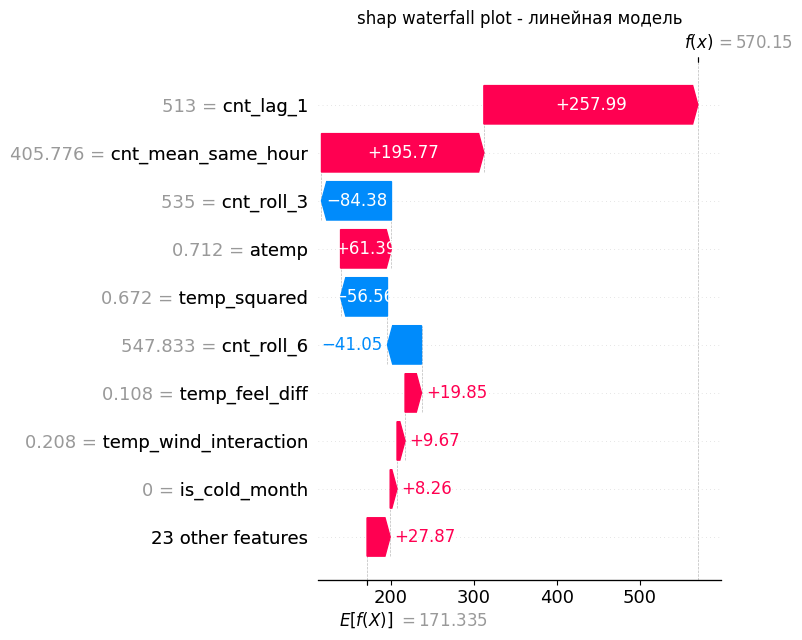

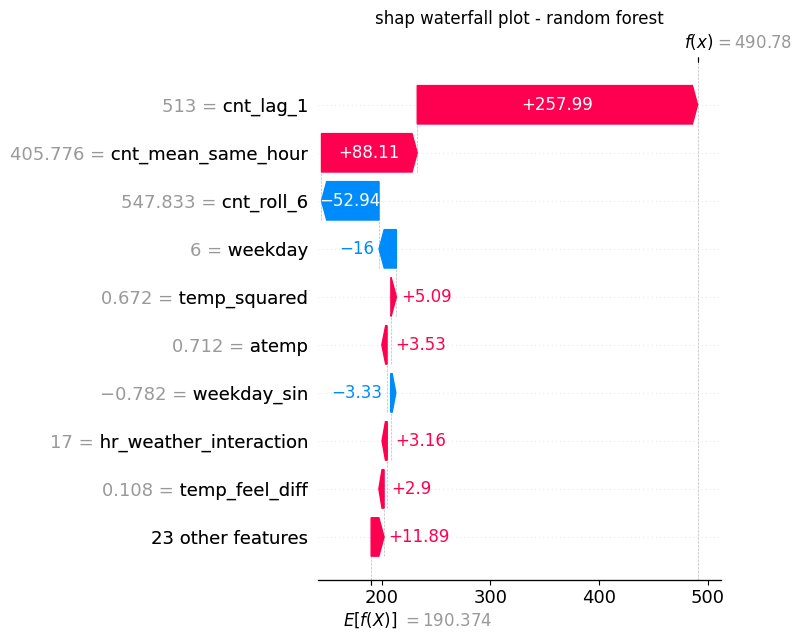

In [94]:
shap_values_lr_local = explainer_lr.shap_values(sample_instance.values.reshape(1, -1))
shap_values_rf_local = explainer_rf.shap_values(sample_instance.values.reshape(1, -1))

if len(shap_values_lr_local.shape) > 1:
    shap_values_lr_local = shap_values_lr_local[0]
if len(shap_values_rf_local.shape) > 1:
    shap_values_rf_local = shap_values_rf_local[0]

shap_local_lr = pd.DataFrame({
    'feature': final_features,
    'shap_value': shap_values_lr_local,
    'feature_value': sample_instance.values
}).sort_values('shap_value', key=abs, ascending=False)

shap_local_rf = pd.DataFrame({
    'feature': final_features,
    'shap_value': shap_values_rf_local,
    'feature_value': sample_instance.values
}).sort_values('shap_value', key=abs, ascending=False)

print('топ-10 признаков по влиянию на предсказание (shap, линейная модель):')
print(shap_local_lr.head(10))
print('\nтоп-10 признаков по влиянию на предсказание (shap, random forest):')
print(shap_local_rf.head(10))

explanation_lr = shap.Explanation(
    values=shap_values_lr_local,
    base_values=explainer_lr.expected_value,
    data=sample_instance.values,
    feature_names=final_features
)
shap.plots.waterfall(explanation_lr, show=False)
plt.title('shap waterfall plot - линейная модель')
plt.tight_layout()
plt.show()

explanation_rf = shap.Explanation(
    values=shap_values_rf_local,
    base_values=explainer_rf.expected_value,
    data=sample_instance.values,
    feature_names=final_features
)
shap.plots.waterfall(explanation_rf, show=False)
plt.title('shap waterfall plot - random forest')
plt.tight_layout()
plt.show()


локальная интерпретация: lime для выбранного наблюдения


In [101]:
exp_lime_lr = explainer_lime_lr.explain_instance(
    sample_instance.values,
    lr_model.predict,
    num_features=15
)

exp_lime_rf = explainer_lime_rf.explain_instance(
    sample_instance.values,
    rf_model.predict,
    num_features=15
)

lime_local_lr = pd.DataFrame(exp_lime_lr.as_list(), columns=['feature', 'importance'])
lime_local_rf = pd.DataFrame(exp_lime_rf.as_list(), columns=['feature', 'importance'])

print('топ-10 признаков по влиянию на предсказание (lime, линейная модель):')
print(lime_local_lr.head(10))
print('\nтоп-10 признаков по влиянию на предсказание (lime, random forest):')
print(lime_local_rf.head(10))


топ-10 признаков по влиянию на предсказание (lime, линейная модель):
                       feature  importance
0           cnt_lag_1 > 281.50  284.381883
1  cnt_mean_same_hour > 204.02  141.960988
2          cnt_roll_3 > 285.67  -79.083344
3                 atemp > 0.62   77.340591
4          temp_squared > 0.44  -51.847625
5          cnt_roll_6 > 282.83  -35.660004
6       is_bad_weather <= 0.00   26.047231
7        is_cold_month <= 0.00   24.743085
8        temp_feel_diff > 0.04   17.461012
9    is_hum_increasing <= 0.00  -13.519814

топ-10 признаков по влиянию на предсказание (lime, random forest):
                                   feature  importance
0                       cnt_lag_1 > 281.50  257.702793
1              cnt_mean_same_hour > 204.02   94.272334
2                           weekday > 5.00   24.228069
3                      cnt_roll_6 > 282.83   -9.077606
4  14.00 < hr_weather_interaction <= 21.00   -8.624732
5                   is_bad_weather <= 0.00    6.139347
6    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [102]:
from IPython.display import HTML

HTML(exp_lime_lr.as_html())


сравнение методов интерпретации для выбранного наблюдения


In [103]:
top_shap_lr = set(shap_local_lr.head(10)['feature'])
top_shap_rf = set(shap_local_rf.head(10)['feature'])
top_lime_lr = set(lime_local_lr.head(10)['feature'])
top_lime_rf = set(lime_local_rf.head(10)['feature'])

print('сравнение топ-10 признаков для выбранного наблюдения:')
print(f'\nshap (lr) и lime (lr): {len(top_shap_lr & top_lime_lr)} общих')
print(f'shap (rf) и lime (rf): {len(top_shap_rf & top_lime_rf)} общих')
print(f'shap (lr) и shap (rf): {len(top_shap_lr & top_shap_rf)} общих')
print(f'lime (lr) и lime (rf): {len(top_lime_lr & top_lime_rf)} общих')

all_methods_common = top_shap_lr & top_shap_rf & top_lime_lr & top_lime_rf
if len(all_methods_common) > 0:
    print(f'\nпризнаки, важные во всех методах: {list(all_methods_common)}')

comparison_local = pd.DataFrame({'feature': final_features})

shap_lr_dict = dict(zip(shap_local_lr['feature'], shap_local_lr['shap_value']))
shap_rf_dict = dict(zip(shap_local_rf['feature'], shap_local_rf['shap_value']))
lime_lr_dict = dict(zip(lime_local_lr['feature'], lime_local_lr['importance']))
lime_rf_dict = dict(zip(lime_local_rf['feature'], lime_local_rf['importance']))

comparison_local['shap_lr'] = comparison_local['feature'].map(shap_lr_dict).fillna(0)
comparison_local['shap_rf'] = comparison_local['feature'].map(shap_rf_dict).fillna(0)
comparison_local['lime_lr'] = comparison_local['feature'].map(lime_lr_dict).fillna(0)
comparison_local['lime_rf'] = comparison_local['feature'].map(lime_rf_dict).fillna(0)

print('\nпризнаки с наибольшим влиянием по всем методам:')
comparison_local['total_importance'] = comparison_local[['shap_lr', 'shap_rf', 'lime_lr', 'lime_rf']].abs().sum(axis=1)
top_local = comparison_local.sort_values('total_importance', ascending=False)
print(top_local[['feature', 'shap_lr', 'shap_rf', 'lime_lr', 'lime_rf']].head(10))


сравнение топ-10 признаков для выбранного наблюдения:

shap (lr) и lime (lr): 0 общих
shap (rf) и lime (rf): 0 общих
shap (lr) и shap (rf): 7 общих
lime (lr) и lime (rf): 6 общих

признаки с наибольшим влиянием по всем методам:
                  feature     shap_lr     shap_rf  lime_lr  lime_rf
30              cnt_lag_1  257.989290  257.988951      0.0      0.0
12     cnt_mean_same_hour  195.773353   88.107475      0.0      0.0
7              cnt_roll_6  -41.050840  -52.936317      0.0      0.0
22             cnt_roll_3  -84.377068   -2.471916      0.0      0.0
6                   atemp   61.385909    3.533336      0.0      0.0
15           temp_squared  -56.556986    5.087812      0.0      0.0
5          temp_feel_diff   19.850341    2.901261      0.0      0.0
31                weekday    5.071532  -15.996274      0.0      0.0
1   temp_wind_interaction    9.665604    1.289978      0.0      0.0
16          is_cold_month    8.263650    1.294735      0.0      0.0


**мини-вывод по шагу:** проведена интерпретация двух моделей (линейная регрессия и random forest) с помощью shap и lime. 

- по глобальной интерпретации: в топ-10 важных признаков для обеих моделей входят 7 общих признаков:
`cnt_lag_1`, `cnt_mean_same_hour`, `temp`, `rolling_temp_3h`, `cnt_roll_3`, `cnt_roll_6`, `peak_hour_weather_interaction`. 
- наиболее важными оказались признаки, связанные с историческими значениями спроса (`cnt_lag_1`, `cnt_mean_same_hour`) и скользящими средними. согласованность направления влияния признаков между моделями составила 40% (12 из 30 признаков), а значит, в логике работы линейной и ансамблевой моделей есть различие

- по локальной интерпретации для выбранного наблюдения: shap и lime показали разное представление важности признаков (0 общих признаков в топ-10 между shap и lime для одной модели), но между моделями одного метода есть согласованность: 6 общих признаков для shap и 5 для lime. для конкретного наблюдения ключевыми оказались `cnt_lag_1` и `cnt_mean_same_hour`, значит, исторические данные для прогнозов влияют больше всего   


In [104]:
def get_shap_embeddings_rf(model, X, explainer=None):
    if explainer is None:
        explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    if isinstance(shap_values, list):
        shap_values = shap_values[0]
    return shap_values, explainer

def get_shap_embeddings_lr(model, X, background, explainer=None):
    if explainer is None:
        explainer = shap.LinearExplainer(model, background)
    shap_values = explainer.shap_values(X)
    return shap_values, explainer

shap_embeddings_rf_train, explainer_rf_shap = get_shap_embeddings_rf(rf_model, X_train_interp)
shap_embeddings_rf_test, _ = get_shap_embeddings_rf(rf_model, X_test_interp, explainer_rf_shap)

shap_embeddings_lr_train, explainer_lr_shap = get_shap_embeddings_lr(lr_model, X_train_interp, X_train_interp)
shap_embeddings_lr_test, _ = get_shap_embeddings_lr(lr_model, X_test_interp, X_train_interp, explainer_lr_shap)

print(f'SHAP-эмбеддинги RF train: {shap_embeddings_rf_train.shape}')
print(f'SHAP-эмбеддинги RF test: {shap_embeddings_rf_test.shape}')
print(f'SHAP-эмбеддинги LR train: {shap_embeddings_lr_train.shape}')
print(f'SHAP-эмбеддинги LR test: {shap_embeddings_lr_test.shape}')


SHAP-эмбеддинги RF train: (13903, 32)
SHAP-эмбеддинги RF test: (3476, 32)
SHAP-эмбеддинги LR train: (13903, 32)
SHAP-эмбеддинги LR test: (3476, 32)


выявление сдвигов и аномалий на основе SHAP-эмбеддингов


In [105]:
from scipy.stats import ks_2samp

mean_shap_rf_train = np.mean(np.abs(shap_embeddings_rf_train), axis=0)
mean_shap_rf_test = np.mean(np.abs(shap_embeddings_rf_test), axis=0)

shift_analysis = pd.DataFrame({
    'feature': final_features,
    'mean_shap_train': mean_shap_rf_train,
    'mean_shap_test': mean_shap_rf_test,
    'shift': mean_shap_rf_test - mean_shap_rf_train,
    'shift_pct': (mean_shap_rf_test - mean_shap_rf_train) / (mean_shap_rf_train + 1e-10) * 100
})

shift_analysis = shift_analysis.sort_values('shift', key=abs, ascending=False)
print('топ-10 признаков с наибольшим сдвигом:')
print(shift_analysis.head(10))

ks_stats = []
for i in range(len(final_features)):
    ks_stat, p_value = ks_2samp(shap_embeddings_rf_train[:, i], shap_embeddings_rf_test[:, i])
    ks_stats.append({'feature': final_features[i], 'ks_stat': ks_stat, 'p_value': p_value})

ks_df = pd.DataFrame(ks_stats).sort_values('ks_stat', ascending=False)
print('\nтоп-10 признаков по KS-статистике (наибольший сдвиг распределения):')
print(ks_df.head(10))


топ-10 признаков с наибольшим сдвигом:
                     feature  mean_shap_train  mean_shap_test     shift  \
30                 cnt_lag_1       117.906379      116.315424 -1.590955   
7                 cnt_roll_6        15.977815       15.662773 -0.315042   
13    hr_weather_interaction         8.138186        7.938394 -0.199792   
31                   weekday         6.323262        6.240213 -0.083049   
24  weather_temp_interaction         1.118781        1.054008 -0.064773   
17                hum_change         0.458776        0.411358 -0.047419   
9       temp_hum_interaction         0.498101        0.456483 -0.041618   
12        cnt_mean_same_hour        37.835671       37.875454  0.039784   
14                 lof_score         0.733713        0.695548 -0.038165   
4       hum_wind_interaction         0.448844        0.412222 -0.036622   

    shift_pct  
30  -1.349338  
7   -1.971746  
13  -2.454996  
31  -1.313383  
24  -5.789565  
17 -10.335967  
9   -8.355314  
12   0.

In [107]:
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [umap-learn]
Note: you may need to restart the kernel to use updated packages.


очистка данных и переобучение модели


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


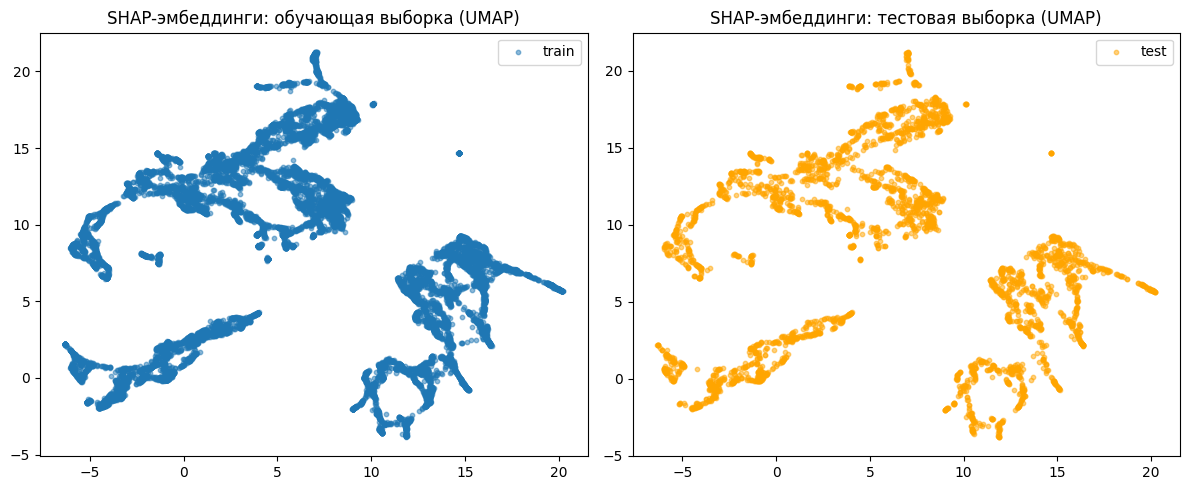

In [108]:
from umap import UMAP

reducer = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
shap_2d_train = reducer.fit_transform(shap_embeddings_rf_train)
shap_2d_test = reducer.transform(shap_embeddings_rf_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(shap_2d_train[:, 0], shap_2d_train[:, 1], alpha=0.5, s=10, label='train')
plt.title('SHAP-эмбеддинги: обучающая выборка (UMAP)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(shap_2d_test[:, 0], shap_2d_test[:, 1], alpha=0.5, s=10, label='test', color='orange')
plt.title('SHAP-эмбеддинги: тестовая выборка (UMAP)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(shap_2d_train[:, 0], shap_2d_train[:, 1], alpha=0.3, s=10, label='train')
plt.scatter(shap_2d_test[:, 0], shap_2d_test[:, 1], alpha=0.3, s=10, label='test', color='orange')
plt.title('SHAP-эмбеддинги: сравнение train и test (UMAP)')
plt.legend()
plt.show()


In [109]:
iso_shap = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
anomalies_shap = iso_shap.fit_predict(shap_embeddings_rf_train)
anomaly_mask = anomalies_shap == -1

print(f'найдено аномалий в SHAP-пространстве: {anomaly_mask.sum()} ({anomaly_mask.mean()*100:.2f}%)')

X_train_cleaned = X_train_interp[~anomaly_mask].copy()
y_train_cleaned = y_train[~anomaly_mask].copy()

print(f'размер обучающей выборки до очистки: {len(X_train_interp)}')
print(f'размер обучающей выборки после очистки: {len(X_train_cleaned)}')


найдено аномалий в SHAP-пространстве: 696 (5.01%)
размер обучающей выборки до очистки: 13903
размер обучающей выборки после очистки: 13207


In [110]:
rf_model_cleaned = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

pred_before = rf_model.predict(X_test_interp)
pred_after = rf_model_cleaned.predict(X_test_interp)

rmse_before = np.sqrt(mean_squared_error(y_test, pred_before))
rmse_after = np.sqrt(mean_squared_error(y_test, pred_after))
mae_before = mean_absolute_error(y_test, pred_before)
mae_after = mean_absolute_error(y_test, pred_after)
r2_before = r2_score(y_test, pred_before)
r2_after = r2_score(y_test, pred_after)

comparison_metrics = pd.DataFrame({
    'метрика': ['RMSE', 'MAE', 'R^2'],
    'до очистки': [rmse_before, mae_before, r2_before],
    'после очистки': [rmse_after, mae_after, r2_after],
    'изменение': [rmse_after - rmse_before, mae_after - mae_before, r2_after - r2_before]
})

print('сравнение метрик до и после очистки:')
print(comparison_metrics)


сравнение метрик до и после очистки:
  метрика  до очистки  после очистки  изменение
0    RMSE   36.404707      42.226855   5.822148
1     MAE   22.388380      24.559643   2.171263
2     R^2    0.958451       0.944099  -0.014352


кластеризация SHAP-эмбеддингов


In [111]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
db_scores = []

for n_clusters in [3, 5, 7, 10]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(shap_embeddings_rf_train)
    
    sil_score = silhouette_score(shap_embeddings_rf_train, labels)
    db_score = davies_bouldin_score(shap_embeddings_rf_train, labels)
    
    silhouette_scores.append(sil_score)
    db_scores.append(db_score)
    
    print(f'K={n_clusters}: Silhouette={sil_score:.4f}, Davies-Bouldin={db_score:.4f}')

optimal_k = [3, 5, 7, 10][np.argmax(silhouette_scores)]
print(f'\nоптимальное число кластеров (по Silhouette): {optimal_k}')


K=3: Silhouette=0.4759, Davies-Bouldin=0.7808
K=5: Silhouette=0.4185, Davies-Bouldin=0.9844
K=7: Silhouette=0.3605, Davies-Bouldin=1.0327
K=10: Silhouette=0.3469, Davies-Bouldin=1.0319

оптимальное число кластеров (по Silhouette): 3


K-Means: 3 кластеров
Agglomerative: 3 кластеров
DBSCAN: 1 кластеров (включая шум: -1)


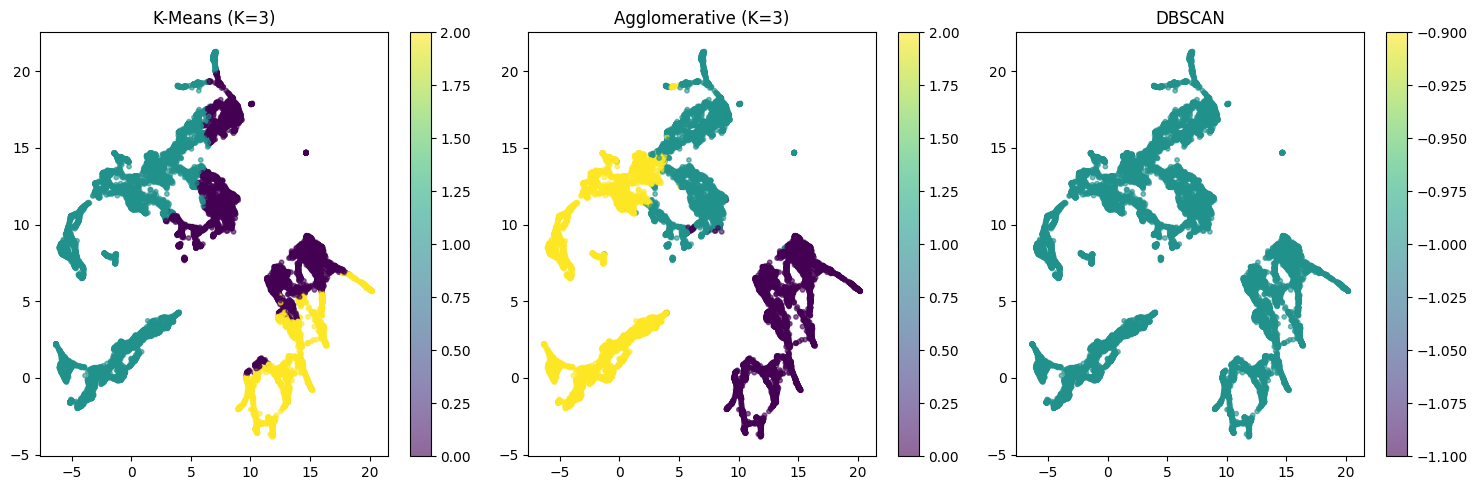

In [112]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(shap_embeddings_rf_train)

agglo = AgglomerativeClustering(n_clusters=optimal_k)
clusters_agglo = agglo.fit_predict(shap_embeddings_rf_train)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(shap_embeddings_rf_train)

print(f'K-Means: {len(np.unique(clusters_kmeans))} кластеров')
print(f'Agglomerative: {len(np.unique(clusters_agglo))} кластеров')
print(f'DBSCAN: {len(np.unique(clusters_dbscan))} кластеров (включая шум: -1)')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(shap_2d_train[:, 0], shap_2d_train[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.6, s=10)
plt.title(f'K-Means (K={optimal_k})')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(shap_2d_train[:, 0], shap_2d_train[:, 1], c=clusters_agglo, cmap='viridis', alpha=0.6, s=10)
plt.title(f'Agglomerative (K={optimal_k})')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.scatter(shap_2d_train[:, 0], shap_2d_train[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.6, s=10)
plt.title('DBSCAN')
plt.colorbar()

plt.tight_layout()
plt.show()

hour_train_with_clusters = hour.iloc[X_train_interp.index].copy()
hour_train_with_clusters['cluster_kmeans'] = clusters_kmeans
hour_train_with_clusters['cluster_agglo'] = clusters_agglo
hour_train_with_clusters['cluster_dbscan'] = clusters_dbscan


интерпретация кластеров и переобучение модели


In [113]:
cluster_analysis = hour_train_with_clusters.groupby('cluster_kmeans').agg({
    'cnt': 'mean',
    'temp': 'mean',
    'hr': 'mean',
    'weekday': 'mean',
    'workingday': 'mean'
}).round(2)

print('характеристики кластеров (K-Means):')
print(cluster_analysis)

print('\nсредний спрос по кластерам:')
print(hour_train_with_clusters.groupby('cluster_kmeans')['cnt'].mean().sort_values(ascending=False))


характеристики кластеров (K-Means):
                   cnt  temp     hr  weekday  workingday
cluster_kmeans                                          
0               223.37  0.55  14.67     3.04        0.75
1                51.09  0.41   7.71     2.93        0.64
2               490.87  0.62  15.27     3.08        0.65

средний спрос по кластерам:
cluster_kmeans
2    490.873449
0    223.373811
1     51.093988
Name: cnt, dtype: float64


In [114]:
X_train_with_cluster = X_train_interp.copy()
X_train_with_cluster['cluster'] = clusters_kmeans

X_test_with_cluster = X_test_interp.copy()
clusters_test = kmeans_final.predict(shap_embeddings_rf_test)
X_test_with_cluster['cluster'] = clusters_test

rf_model_with_cluster = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_with_cluster.fit(X_train_with_cluster, y_train)

pred_with_cluster = rf_model_with_cluster.predict(X_test_with_cluster)

rmse_with_cluster = np.sqrt(mean_squared_error(y_test, pred_with_cluster))
mae_with_cluster = mean_absolute_error(y_test, pred_with_cluster)
r2_with_cluster = r2_score(y_test, pred_with_cluster)

print('метрики модели с признаком кластера:')
print(f'RMSE: {rmse_with_cluster:.2f}')
print(f'MAE: {mae_with_cluster:.2f}')
print(f'R^2: {r2_with_cluster:.4f}')

print(f'\nсравнение с моделью без кластера:')
print(f'RMSE: {rmse_before:.2f} -> {rmse_with_cluster:.2f} (изменение: {rmse_with_cluster - rmse_before:.2f})')
print(f'R^2: {r2_before:.4f} -> {r2_with_cluster:.4f} (изменение: {r2_with_cluster - r2_before:.4f})')


метрики модели с признаком кластера:
RMSE: 36.60
MAE: 22.70
R^2: 0.9580

сравнение с моделью без кластера:
RMSE: 36.40 -> 36.60 (изменение: 0.20)
R^2: 0.9585 -> 0.9580 (изменение: -0.0004)


кросс-валидация с SHAP-эмбеддингами


In [116]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores_shap_only = []
scores_shap_concat = []

for train_idx, val_idx in kf.split(X_train_interp):
    X_train_cv = X_train_interp.iloc[train_idx]
    X_val_cv = X_train_interp.iloc[val_idx]
    y_train_cv = y_train.iloc[train_idx]
    y_val_cv = y_train.iloc[val_idx]
    
    shap_train_cv = shap_embeddings_rf_train[train_idx]
    shap_val_cv = shap_embeddings_rf_train[val_idx]
    
    rf_shap_only = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf_shap_only.fit(shap_train_cv, y_train_cv)
    score_shap_only = rf_shap_only.score(shap_val_cv, y_val_cv)
    scores_shap_only.append(score_shap_only)
    
    X_train_concat = np.hstack([X_train_cv.values, shap_train_cv])
    X_val_concat = np.hstack([X_val_cv.values, shap_val_cv])
    
    rf_shap_concat = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf_shap_concat.fit(X_train_concat, y_train_cv)
    score_shap_concat = rf_shap_concat.score(X_val_concat, y_val_cv)
    scores_shap_concat.append(score_shap_concat)

print(f'R^2 только на SHAP-эмбеддингах: {np.mean(scores_shap_only):.4f} ± {np.std(scores_shap_only):.4f}')
print(f'R^2 на конкатенации признаков и SHAP-эмбеддингов: {np.mean(scores_shap_concat):.4f} ± {np.std(scores_shap_concat):.4f}')


R^2 только на SHAP-эмбеддингах: 0.9910 ± 0.0009
R^2 на конкатенации признаков и SHAP-эмбеддингов: 0.9907 ± 0.0009


построение графа взаимосвязей признаков и Shapley Flow


In [117]:
import networkx as nx

corr_matrix = X_train_interp.corr().abs()
threshold = 0.3

G = nx.Graph()
for i in range(len(final_features)):
    for j in range(i+1, len(final_features)):
        if corr_matrix.iloc[i, j] > threshold:
            G.add_edge(final_features[i], final_features[j], weight=corr_matrix.iloc[i, j])

print(f'граф содержит {G.number_of_nodes()} узлов и {G.number_of_edges()} рёбер')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, 
        font_size=8, font_weight='bold', edge_color='gray', width=0.5)
plt.title('Граф взаимосвязей признаков (порог корреляции > 0.3)')
plt.tight_layout()
plt.show()


граф содержит 32 узлов и 82 рёбер


/var/folders/x_/1kz8mfnd1n37htjn5dc3l5_m0000gn/T/ipykernel_19351/2726585503.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [118]:
shap_flow_values = shap_embeddings_rf_train.copy()

for i in range(len(final_features)):
    feature = final_features[i]
    neighbors = list(G.neighbors(feature))
    
    if len(neighbors) > 0:
        neighbor_indices = [final_features.index(n) for n in neighbors]
        neighbor_shap_mean = np.mean(shap_embeddings_rf_train[:, neighbor_indices], axis=1)
        shap_flow_values[:, i] = shap_embeddings_rf_train[:, i] + 0.1 * neighbor_shap_mean

print('Shapley Flow эмбеддинги вычислены')
print(f'Размерность: {shap_flow_values.shape}')


Shapley Flow эмбеддинги вычислены
Размерность: (13903, 32)


интерпретация и кластеризация Shapley Flow


топ-10 признаков по важности (Shapley Flow):
                   feature  mean_shap_flow
30               cnt_lag_1      118.182177
12      cnt_mean_same_hour       39.311253
7               cnt_roll_6       15.931603
13  hr_weather_interaction        8.229426
31                 weekday        6.347831
22              cnt_roll_3        3.702157
15            temp_squared        3.156840
6                    atemp        3.125169
23                      yr        2.054805
28                mnth_cos        1.857182


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


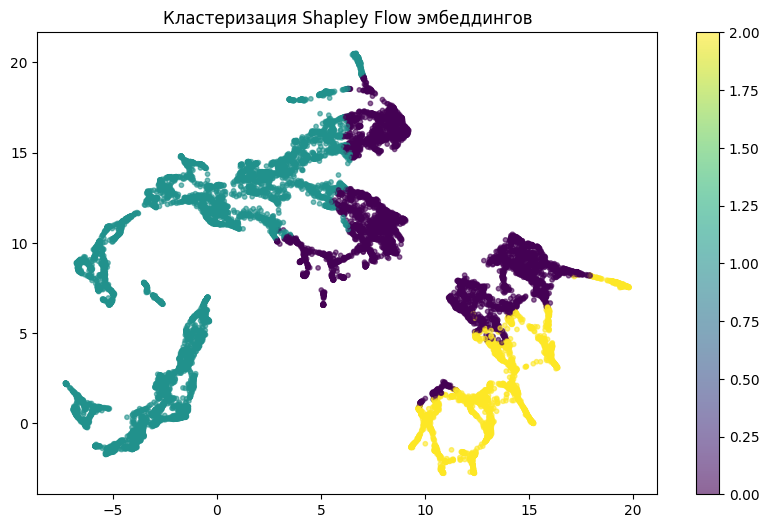

In [119]:
mean_shap_flow = np.mean(np.abs(shap_flow_values), axis=0)

shap_flow_importance = pd.DataFrame({
    'feature': final_features,
    'mean_shap_flow': mean_shap_flow
}).sort_values('mean_shap_flow', ascending=False)

print('топ-10 признаков по важности (Shapley Flow):')
print(shap_flow_importance.head(10))

reducer_flow = UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
shap_flow_2d = reducer_flow.fit_transform(shap_flow_values)

kmeans_flow = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_flow = kmeans_flow.fit_predict(shap_flow_values)

plt.figure(figsize=(10, 6))
plt.scatter(shap_flow_2d[:, 0], shap_flow_2d[:, 1], c=clusters_flow, cmap='viridis', alpha=0.6, s=10)
plt.title('Кластеризация Shapley Flow эмбеддингов')
plt.colorbar()
plt.show()


сравнительный анализ: SHAP vs Shapley Flow


In [120]:
comparison_shap_vs_flow = pd.DataFrame({
    'feature': final_features,
    'shap_importance': np.abs(shap_embeddings_rf_train).mean(axis=0),
    'shap_flow_importance': np.abs(shap_flow_values).mean(axis=0)
})

comparison_shap_vs_flow['difference'] = comparison_shap_vs_flow['shap_flow_importance'] - comparison_shap_vs_flow['shap_importance']
comparison_shap_vs_flow = comparison_shap_vs_flow.sort_values('difference', key=abs, ascending=False)

print('признаки с наибольшей разницей между SHAP и Shapley Flow:')
print(comparison_shap_vs_flow.head(10))

cluster_agreement = (clusters_kmeans == clusters_flow).sum() / len(clusters_kmeans)
print(f'\nсовпадение кластеров SHAP и Shapley Flow: {cluster_agreement*100:.2f}%')

rf_flow = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_flow.fit(shap_flow_values, y_train)

shap_flow_test, _ = get_shap_embeddings_rf(rf_model, X_test_interp, explainer_rf_shap)
for i in range(len(final_features)):
    feature = final_features[i]
    neighbors = list(G.neighbors(feature))
    if len(neighbors) > 0:
        neighbor_indices = [final_features.index(n) for n in neighbors]
        neighbor_shap_mean = np.mean(shap_flow_test[:, neighbor_indices], axis=1)
        shap_flow_test[:, i] = shap_flow_test[:, i] + 0.1 * neighbor_shap_mean

pred_flow = rf_flow.predict(shap_flow_test)
r2_flow = r2_score(y_test, pred_flow)

print(f'\nR^2 модели на Shapley Flow эмбеддингах: {r2_flow:.4f}')
print(f'R^2 модели на SHAP эмбеддингах: {r2_before:.4f}')
print(f'Разница: {r2_flow - r2_before:.4f}')


признаки с наибольшей разницей между SHAP и Shapley Flow:
                  feature  shap_importance  shap_flow_importance  difference
12     cnt_mean_same_hour        37.835671             39.311253    1.475583
1   temp_wind_interaction         0.399683              1.485395    1.085712
23                     yr         1.345786              2.054805    0.709019
15           temp_squared         2.699027              3.156840    0.457813
6                   atemp         2.668807              3.125169    0.456362
18            weekday_sin         0.922522              1.354981    0.432459
30              cnt_lag_1       117.906379            118.182177    0.275799
19         is_bad_weather         0.103173              0.276913    0.173741
3              weathersit         0.131693              0.252554    0.120861
20          is_warm_month         0.101114              0.197193    0.096079

совпадение кластеров SHAP и Shapley Flow: 99.27%

R^2 модели на Shapley Flow эмбеддингах: 0.95